In [ ]:
import psutil
import os
import sys
import platform
import sysconfig
import pandas   as     pd
import numpy    as     np
import sklearn
import time
from   tabulate import tabulate
from   platform import python_version
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# check scikit-learn version
print(sklearn.__version__)
print(sys.version)

1.6.1
3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'df_cleaned_data (1).csv',encoding='latin')
df=data.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'df_cleaned_data (1).csv'

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               188533 non-null  int64  
 1   brand            188474 non-null  object 
 2   model            188474 non-null  object 
 3   model_year       188533 non-null  int64  
 4   milage           188533 non-null  int64  
 5   fuel_type        182669 non-null  object 
 6   engine           188533 non-null  object 
 7   ext_col          188078 non-null  object 
 8   int_col          183996 non-null  object 
 9   accident         186081 non-null  object 
 10  clean_title      167114 non-null  object 
 11  price            188533 non-null  int64  
 12  HP               156207 non-null  object 
 13  Litres           181803 non-null  float64
 14  Cylinders        174379 non-null  float64
 15  cylinder_layout  188533 non-null  object 
 16  fuel_type_new    187581 non-null  obje

In [ ]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,ext_col,int_col,accident,clean_title,price,HP,Litres,Cylinders,cylinder_layout,fuel_type_new,color_category,transmission
0,0,Mini,Cooper S,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Yellow,Gray,None reported,Yes,4200,172,1.6,4.0,Unknown,Gasoline,Affordable,1-Speed Automatic Transmission (A/T)
1,1,Lincoln,Ls V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Silver Metallic,Beige,At least 1 accident or damage reported,Yes,4999,252,3.9,8.0,Unknown,Gasoline,Luxury,1-Speed Automatic Transmission (A/T)
2,2,Chevrolet,Silverado 2500 Lt,2002,136731,Flexible Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Blue Metallic,Gray,None reported,Yes,13900,320,5.3,8.0,Unknown,Flex Fuel,Premium,1-Speed Automatic Transmission (A/T)
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Black Metallic,Black,None reported,Yes,45000,420,5.0,8.0,Unknown,Gasoline,Luxury,Dual-Clutch Transmission (DCT)
4,4,Mercedes-Benz,Metris,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Black Metallic,Beige,None reported,Yes,97500,208,2.0,4.0,Unknown,Gasoline,Luxury,7 Speed Automatic Transmission (A/T)


In [ ]:
df.describe()

,id,model_year,milage,price,Litres,Cylinders
count,188533.000000,188533.000000,188533.000000,1.885330e+05,181803.000000,174379.000000
mean,94266.000000,2015.829998,65705.295174,4.387802e+04,3.774882,6.356843
std,54424.933488,5.660967,49798.158076,7.881952e+04,1.352027,1.598748
min,0.000000,1974.000000,100.000000,2.000000e+03,0.650000,3.000000
25%,47133.000000,2013.000000,24115.000000,1.700000e+04,3.000000,6.000000
50%,94266.000000,2017.000000,57785.000000,3.082500e+04,3.500000,6.000000
75%,141399.000000,2020.000000,95400.000000,4.990000e+04,4.700000,8.000000
max,188532.000000,2024.000000,405000.000000,2.954083e+06,8.400000,16.000000


In [ ]:
df['Cylinders'].value_counts()

Cylinders
6.0     75639
8.0     59564
4.0     35231
12.0     1808
10.0     1087
5.0       627
3.0       403
16.0       20
Name: count, dtype: int64

In [ ]:
df.drop(['id','clean_title'],axis=1,inplace=True)

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,ext_col,int_col,accident,price,HP,Litres,Cylinders,cylinder_layout,fuel_type_new,color_category,transmission
0,Mini,Cooper S,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Yellow,Gray,None reported,4200,172,1.6,4.0,Unknown,Gasoline,Affordable,1-Speed Automatic Transmission (A/T)
1,Lincoln,Ls V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Silver Metallic,Beige,At least 1 accident or damage reported,4999,252,3.9,8.0,Unknown,Gasoline,Luxury,1-Speed Automatic Transmission (A/T)
2,Chevrolet,Silverado 2500 Lt,2002,136731,Flexible Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Blue Metallic,Gray,None reported,13900,320,5.3,8.0,Unknown,Flex Fuel,Premium,1-Speed Automatic Transmission (A/T)
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Black Metallic,Black,None reported,45000,420,5.0,8.0,Unknown,Gasoline,Luxury,Dual-Clutch Transmission (DCT)
4,Mercedes-Benz,Metris,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Black Metallic,Beige,None reported,97500,208,2.0,4.0,Unknown,Gasoline,Luxury,7 Speed Automatic Transmission (A/T)


In [ ]:
df.query('brand=="Tesla"')['Cylinders'].head()

11    NaN
32    NaN
51    NaN
52    NaN
161   NaN
Name: Cylinders, dtype: float64

In [ ]:
df['engine']=df['engine'].replace('–',np.nan)
df['HP']=df['HP'].replace('â\x80\x93',np.nan)

In [ ]:
df['HP']=df['HP'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   brand            188474 non-null  object 
 1   model            188474 non-null  object 
 2   model_year       188533 non-null  int64  
 3   milage           188533 non-null  int64  
 4   fuel_type        182669 non-null  object 
 5   engine           188533 non-null  object 
 6   ext_col          188078 non-null  object 
 7   int_col          183996 non-null  object 
 8   accident         186081 non-null  object 
 9   price            188533 non-null  int64  
 10  HP               155282 non-null  float64
 11  Litres           181803 non-null  float64
 12  Cylinders        174379 non-null  float64
 13  cylinder_layout  188533 non-null  object 
 14  fuel_type_new    187581 non-null  object 
 15  color_category   188533 non-null  object 
 16  transmission     188446 non-null  obje

In [ ]:
target_brands=['Tesla',
'Rivian',
'Lucid' ,
'Polestar']
exclude_patterns_list =[
    'Electric Motor Electric Fuel System',
    'Dual Motor - Standard',
    'Electric',
    'Standard Range Battery'
]
regex_pattern = '|'.join(exclude_patterns_list)

In [ ]:
mask =(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))
df.loc[mask, 'Cylinders'] = 0

In [ ]:
df[(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))]['Cylinders'].value_counts()

Cylinders
0.0    4345
Name: count, dtype: int64

In [ ]:
df[(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))]['brand'].value_counts()

brand
Tesla       3715
Rivian       566
Lucid         60
Polestar       4
Name: count, dtype: int64

In [ ]:
mask =(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))
df.loc[mask, 'fuel_type_new'] = 'Electric'

In [ ]:
mask =(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))
df.loc[mask, 'Cylinders'] = 0

In [ ]:
mask =(df['brand'].isin(target_brands)) &  (df['engine'].str.contains(regex_pattern, case=False, na=False))
df.loc[mask, 'Litres'] = 0

In [ ]:
df['fuel_type_new'].unique()

array(['Gasoline', 'Flex Fuel', nan, 'Electric', 'Hybrid', 'Diesel'],
      dtype=object)

In [ ]:
df.query('brand=="Tesla"')['fuel_type_new'].unique()

array(['Electric'], dtype=object)

In [ ]:
df.query('brand=="Tesla"')['Litres'].unique()

array([0.])

# MICE

In [ ]:
use=df.drop(['fuel_type','accident','color_category'],axis=1)
use.columns

Index(['brand', 'model', 'model_year', 'milage', 'engine', 'ext_col',
       'int_col', 'price', 'HP', 'Litres', 'Cylinders', 'cylinder_layout',
       'fuel_type_new', 'transmission'],
      dtype='object')

In [ ]:
!pip install fancyimpute

In [ ]:
from fancyimpute import IterativeImputer

# Assuming your DataFrame is named 'df'
# If you have the DataFrame loaded, replace this with your actual DataFrame
# For demonstration, I'll use the structure provided
# df = your_dataframe

# Step 1: Store the original dtypes
original_dtypes = use.dtypes

# Step 2: Identify columns with missing values
columns_with_missing = use.columns[use.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing)

# Step 3: Separate numeric and categorical columns
numeric_columns = use.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = use.select_dtypes(include=['object']).columns

# Step 4: Create a copy of the DataFrame for imputation
df_imputed = use.copy()

# Step 5: Perform MICE imputation
# MICE works with numeric data, so we need to encode categorical variables
# Convert categorical columns to numeric codes for imputation
for col in categorical_columns:
    df_imputed[col] = df_imputed[col].astype('category').cat.codes
    # Replace -1 (NaN in categorical codes) with np.nan for MICE
    df_imputed[col] = df_imputed[col].replace(-1, np.nan)

# Initialize MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Perform imputation
df_imputed_array = mice_imputer.fit_transform(df_imputed)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=use.columns)

# Step 6: Restore original data types
# For numeric columns, round floats to match original precision if needed
for col in numeric_columns:
    if original_dtypes[col] == 'int64':
        df_imputed[col] = df_imputed[col].round().astype('int64')
    elif original_dtypes[col] == 'float64':
        df_imputed[col] = df_imputed[col].astype('float64')

# For categorical columns, map back to original categories
for col in categorical_columns:
    original_categories = use[col].astype('category').cat.categories
    most_frequent_category = use[col].mode()[0]  # Default to most frequent category
    df_imputed[col] = df_imputed[col].round().astype(int).apply(
        lambda x: original_categories[x] if 0 <= x < len(original_categories) else most_frequent_category
    )
    df_imputed[col] = df_imputed[col].astype('object')

# Step 7: Verify data types
print("Data types after imputation:")
print(df_imputed.dtypes)

# Step 8: Check for remaining missing values
print("Remaining missing values after imputation:")
print(df_imputed.isnull().sum())

# Step 9: Replace the original DataFrame with the imputed one if needed
#df = df_imputed

# Optional: Save the imputed DataFrame to a CSV file
# df.to_csv('imputed_data.csv', index=False)

Columns with missing values: ['brand', 'model', 'ext_col', 'int_col', 'HP', 'Litres', 'Cylinders', 'fuel_type_new', 'transmission']
Data types after imputation:
brand               object
model               object
model_year           int64
milage               int64
engine              object
ext_col             object
int_col             object
price                int64
HP                 float64
Litres             float64
Cylinders          float64
cylinder_layout     object
fuel_type_new       object
transmission        object
dtype: object
Remaining missing values after imputation:
brand              0
model              0
model_year         0
milage             0
engine             0
ext_col            0
int_col            0
price              0
HP                 0
Litres             0
Cylinders          0
cylinder_layout    0
fuel_type_new      0
transmission       0
dtype: int64


In [ ]:
for i in df_imputed.select_dtypes(exclude=object).columns:
  print(i,df[i].min())

model_year 1974
milage 100
price 2000
HP 70.0
Litres 0.0
Cylinders 0.0


In [ ]:
for i in df_imputed.select_dtypes(exclude=object).columns:
  print(i,df_imputed[i].min())

model_year 1974
milage 100
price 2000
HP 70.0
Litres 0.0
Cylinders 0.0


In [ ]:
df_imputed['Cylinders'].unique()

array([4.        , 8.        , 6.        , ..., 6.1284412 , 3.75578091,
       5.30844496])

In [ ]:
df_imputed['Cylinders']=round(df_imputed['Cylinders'],0).astype(int)

In [ ]:
df_imputed.query('brand=="Tesla"')['Cylinders'].unique()

array([0])

In [ ]:
df.isnull().sum()

brand                 59
model                 59
model_year             0
milage                 0
fuel_type           5864
engine                 0
ext_col              455
int_col             4537
accident            2452
price                  0
HP                 33251
Litres              2385
Cylinders           9809
cylinder_layout        0
fuel_type_new        861
color_category         0
transmission          87
dtype: int64

In [ ]:
df_imputed.isnull().sum()

brand              0
model              0
model_year         0
milage             0
engine             0
ext_col            0
int_col            0
price              0
HP                 0
Litres             0
Cylinders          0
cylinder_layout    0
fuel_type_new      0
transmission       0
dtype: int64

In [ ]:
col=['HP','Litres','Cylinders','cylinder_layout']
for i in col:
  print(i,':',df_imputed[i].nunique())
  print(df_imputed[i].unique())

HP : 33583
[172.         252.         320.         ... 509.16751353 181.46053244
 302.17566335]
Litres : 2447
[1.6        3.9        5.3        ... 4.44530861 4.48844932 4.51100371]
Cylinders : 13
[ 4  8  6  0 10 12  5  3  7  9  1  2 16]
cylinder_layout : 5
['Unknown' 'V-engine' 'Inline/Straight' 'Boxer' 'W-engine']


In [ ]:
null_check=df[df['fuel_type_new'].isnull()].index
null_check

Index([     8,    532,   1155,   1307,   1362,   1741,   1802,   2234,   2277,
         2381,
       ...
       186488, 186509, 186521, 187111, 187215, 187399, 187664, 187820, 188189,
       188368],
      dtype='int64', length=861)

In [ ]:
not_electric=[
    'Land Rover',
    'RAM',
    'INFINITI',
    'Jeep',
    'McLaren',
    'Mitsubishi',
    'Pontiac',
    'Saturn',
    'Aston Martin',
    'Lamborghini',
    'Chrysler',
    'Karma',
    'Scion',
    'Plymouth',
    'Saab',
    'Mercury'
]

In [ ]:
for i in null_check[:25]:
  if df_imputed.loc[i,'brand'] in not_electric and df_imputed.loc[i,'fuel_type_new']=='Gasoline':
    print(use.loc[i,['brand','fuel_type_new']])
    print()
    print(df_imputed.loc[i,['brand','fuel_type_new']])
    print('----------------------------------------------------------------------------------------')

brand            NaN
fuel_type_new    NaN
Name: 2694, dtype: object

brand            Lamborghini
fuel_type_new       Gasoline
Name: 2694, dtype: object
----------------------------------------------------------------------------------------
brand            Chrysler
fuel_type_new         NaN
Name: 3543, dtype: object

brand            Chrysler
fuel_type_new    Gasoline
Name: 3543, dtype: object
----------------------------------------------------------------------------------------
brand            RAM
fuel_type_new    NaN
Name: 5640, dtype: object

brand                 RAM
fuel_type_new    Gasoline
Name: 5640, dtype: object
----------------------------------------------------------------------------------------


In [ ]:
electric=['Tesla', 'Rivian', 'Porsche', 'Nissan', 'Chevrolet', 'Ford',
       'Mercedes-Benz', 'Kia', 'Lucid', 'Audi', 'Karma', 'Hyundai', 'BMW',
       'Volkswagen', 'Buick', 'Dodge', 'Volvo', 'Toyota', 'Pontiac',
       'Acura', 'Land Rover', 'GMC', 'Jeep', 'McLaren', 'Cadillac',
       'Lincoln', 'Maserati', 'Polestar', 'FIAT', 'INFINITI',
       'Mitsubishi', 'Mini', 'Lexus', 'Jaguar', 'Bentley', 'Alfa Romeo']

In [ ]:
for i in electric:
  if electric in not_electric:
    print(i)
  else:
    print('correct')

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct


In [ ]:
df_imputed.query('brand=="Tesla"')['Cylinders'].unique()

array([0])

In [ ]:
df_imputed.to_csv('corrected_imputed.csv',index=False)

In [ ]:
df_imputed.query('fuel_type_new=="Electric"')['engine'].unique()

array(['Electric Motor Electric Fuel System',
       '518.0HP Electric Motor Electric Fuel System',
       '835.0HP Electric Motor Electric Fuel System',
       'Dual Motor - Standard',
       '670.0HP Electric Motor Electric Fuel System', 'Electric',
       '425.0HP Electric Motor Electric Fuel System',
       '455.0HP Electric Motor Electric Fuel System',
       '557.0HP Electric Motor Electric Fuel System',
       '200.0HP Electric Motor Electric Fuel System',
       '214.0HP Electric Motor Electric Fuel System',
       '778.0HP Electric Motor Electric Fuel System',
       '271.0HP Electric Motor Electric Fuel System',
       '482.0HP Electric Motor Electric Fuel System',
       '480.0HP Electric Motor Electric Fuel System',
       '362.0HP Electric Motor Electric Fuel System',
       '201.0HP Electric Motor Electric Fuel System',
       '563.0HP Electric Motor Electric Fuel System',
       '534.0HP Electric Motor Electric Fuel System',
       '266.0HP Electric Motor Electric Fuel S

In [ ]:
df_correct=df_imputed.copy()

In [ ]:
train_cleaned=pd.concat([df_correct,df[[ 'accident','color_category']]],axis=1)

In [ ]:
train_cleaned=train_cleaned[['brand', 'model', 'model_year', 'milage','transmission',
                             'engine', 'HP', 'Litres', 'Cylinders', 'cylinder_layout','fuel_type_new','ext_col',
       'int_col','color_category','accident' ,'price']]

In [ ]:
train_cleaned.columns

Index(['brand', 'model', 'model_year', 'milage', 'transmission', 'engine',
       'HP', 'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type_new',
       'ext_col', 'int_col', 'color_category', 'accident', 'price'],
      dtype='object')

In [ ]:
train_cleaned.to_csv(r'train_cleaned_dataset.csv',index=False)

In [ ]:
train_cleaned.describe()

,model_year,milage,HP,Litres,Cylinders,price
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,341.362139,3.695968,6.170766,4.387802e+04
std,5.660967,49798.158076,116.475350,1.446700,1.838355,7.881952e+04
min,1974.000000,100.000000,70.000000,0.000000,0.000000,2.000000e+03
25%,2013.000000,24115.000000,260.000000,2.900000,6.000000,1.700000e+04
50%,2017.000000,57785.000000,320.000000,3.500000,6.000000,3.082500e+04
75%,2020.000000,95400.000000,420.000000,4.700000,8.000000,4.990000e+04
max,2024.000000,405000.000000,1020.000000,8.400000,16.000000,2.954083e+06


In [ ]:
data=pd.read_csv(r'train_cleaned_dataset.csv',encoding='latin')
df=data.copy()

In [ ]:
df['accident']=df['accident'].replace(np.nan,'Unknown')

In [ ]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported',
       'Unknown'], dtype=object)

In [ ]:
def value_counts_df(df, var):
    df_value_counts          =  df[var].value_counts()
    df_value_counts          =  df_value_counts.reset_index()
    df_value_counts.columns  =  ['unique_values', 'counts']
    return  df_value_counts

def reduce_levels(df, col, N):
    new_col                  =  col + '_EDA'
    df[new_col]              =  df[col]
    df_n                     =  value_counts_df(df, new_col)
    top_N_cols               =  df_n.loc[:N-1, 'unique_values'].values
    col_values               =  df_n.loc[:, 'unique_values'].values
    print(top_N_cols)
    Not_top_N                =  list(set(col_values) - set(top_N_cols))
    df[new_col]              =  df[new_col].replace(Not_top_N, value = "Others")
    print(df.head())
    df_m                     =  value_counts_df(df, new_col)
    return df

In [ ]:
topn_col=['brand', 'model','ext_col', 'int_col','model_year','transmission']

In [ ]:
for i in topn_col: #top N
  df1=reduce_levels(df, i, 10).copy()

['Ford' 'Mercedes-Benz' 'BMW' 'Chevrolet' 'Audi' 'Porsche' 'Land Rover'
 'Toyota' 'Lexus' 'Jeep']
           brand              model  model_year  milage  \
0           Mini           Cooper S        2007  213000   
1        Lincoln              Ls V8        2002  143250   
2      Chevrolet  Silverado 2500 Lt        2002  136731   
3        Genesis   G90 5.0 Ultimate        2017   19500   
4  Mercedes-Benz             Metris        2021    7388   

                           transmission  \
0  1-Speed Automatic Transmission (A/T)   
1  1-Speed Automatic Transmission (A/T)   
2  1-Speed Automatic Transmission (A/T)   
3        Dual-Clutch Transmission (DCT)   
4  7 Speed Automatic Transmission (A/T)   

                                              engine     HP  Litres  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel  172.0     1.6   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel  252.0     3.9   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...  320.0     5.3   
3   

In [ ]:
 df1=df1.rename(columns={'fuel_type_new': 'fuel_type'})

In [ ]:
for i in df1.columns:
  print(i,df1[i].nunique())

brand 57
model 1874
model_year 34
milage 6651
transmission 21
engine 1117
HP 33583
Litres 2447
Cylinders 13
cylinder_layout 5
fuel_type 5
ext_col 104
int_col 105
color_category 4
accident 3
price 1569
brand_EDA 11
model_EDA 11
ext_col_EDA 11
int_col_EDA 11
model_year_EDA 11
transmission_EDA 11


In [ ]:
df1.to_csv(r'train_cleaned_EDA_dataset.csv',index=False)

In [ ]:
import   pandas                 as      pd
import   numpy                  as      np
import   matplotlib.pyplot      as      plt
import   seaborn                as      sns
import   scipy.stats            as      stats
from     scipy                  import  stats
from     scipy.stats            import  mannwhitneyu, norm
import   statsmodels.api        as      sm
from     sklearn.preprocessing                 import   LabelEncoder
from     statsmodels.stats.outliers_influence  import   variance_inflation_factor
import   warnings

from    sklearn.preprocessing    import   StandardScaler
from    sklearn.preprocessing    import   MinMaxScaler
from    sklearn.tree             import   DecisionTreeClassifier
from    sklearn.metrics          import   accuracy_score, explained_variance_score

from    sklearn.experimental     import enable_iterative_imputer
from    sklearn.impute           import IterativeImputer
from    sklearn.linear_model     import LinearRegression

In [ ]:
def  barplot(df, var1, var2, xlab, ylab, title):
    import matplotlib.pyplot as plt

    ct1  =  pd.crosstab(df[var1], df[var2], dropna=False)
    # print("\nCross Tabulation of %s vs %s" % (var1, var2))
    # print(ct1)

    ct2  =  round(pd.crosstab(df[var1], df[var2], dropna = False, normalize = 'index'),2)*100
    tab  =  pd.concat([ct1, ct2], axis = 1, keys = ['n', 'Percentage'])

    ct   = ct2
    ax   = ct.plot(kind = 'bar', stacked = True, rot = 90)
    ax.legend(title = 'Readmitted', labels = ['Not Readmitted','Readmitted'],  bbox_to_anchor = (1, 1.02), loc = 'upper left')

    # add annotations if desired
    for c in ax.containers:

        # set the bar label
        ax.bar_label(c, label_type = 'center')
    plt.show()

In [ ]:
def chk_kruskal(df, cat_col, target):
  import       scipy.stats   as   stats

  # Group prices by category
  groups = [group[target].values for name, group in df.groupby(cat_col)]

  # Perform Kruskal-Wallis test
  stat, pval = stats.kruskal(*groups)

  txt          =   "\nThere's no real difference between the groups, {} ".format(var)
  if pval < 0.05:
    txt       =   "\nAt least one group stands out from the rest, {} ".format(var)
  print(txt)

In [ ]:
!pip install scikit_posthocs

In [ ]:
def dunns_post_hoc(df, cat_col, target):
  import scikit_posthocs as sp

  # Perform Dunn's post hoc test
  dunn_result = sp.posthoc_dunn(df, val_col=target, group_col=var, p_adjust='bonferroni')

  # Display pairwise p-values
  print(dunn_result)

In [ ]:
def  draw_countplot(df, i, var, target):
     import  matplotlib.pyplot   as  plt
     import  seaborn             as  sns
     print("\n{0}: Variable, {1}".format(i, var))
     x         =  df[var]
     y         =  df[target]
     ttile     =  "Bar Chart for the variable: {}".format(var)
     plt.title(ttile)
     sns.countplot(x = x, hue = y, data = df)
     plt.xticks(rotation = 90)
     plt.show()


In [ ]:

def identify_outliers(df, var):
    # Interquartile Range (IQR)

    # Calculate the upper and lower limits
    Q1                     =    df[var].quantile(0.25)
    Q3                     =    df[var].quantile(0.75)
    IQR                    =    Q3 - Q1
    low                    =    Q1 - (1.5 * IQR)

    lower                  =    abs(Q1 - 1.5 * IQR)
    upper                  =    abs(Q3 + (1.5 * IQR))
    outlier_upper          =    df[df[var] > upper].count()[1]
    outlier_lower          =    df[df[var] < low].count()[1]

    m                      =    np.min(df[var])
    mX                     =    np.max(df[var])
    Zero_l                 =    df.loc[df[var]==0,var].sum()

    print("\nFeature :{} Lower_quartile: {} ,Upper_quartile: {} ".format(var,lower, upper))
    print("\nMax value: {} Minimum value: {}".format(mX, m))
    print("\nGreater than UpperIQR : {}, Less than lower_IQR : {} ,  zero_count:  {}".format(outlier_upper,outlier_lower,Zero_l))

    outliers_present       =   outlier_upper > 0 or outlier_lower > 0
    if outliers_present:
       print("\nVariable {} has outliers".format(var))
    else:
       print("\nVariable {} has NO outliers".format(var))
    df.boxplot(column = [var])
    plt.show()

In [ ]:
def get_lower(df, var):
    q3          =  df[var].quantile(0.75)
    q1          =  df[var].quantile(0.25)
    IQR         =  q3 - q1
    lower_limit =  q1 - (IQR * 1.5)
    return lower_limit

In [ ]:
def get_upper(df, var):
    q3          =  df[var].quantile(0.75)
    q1          =  df[var].quantile(0.25)
    IQR         =  q3 - q1
    upper_limit =  q3 + (IQR * 1.5)
    return upper_limit

In [ ]:
def chk_dagastino(data, var):
    # D'Agostino and Pearson's Test
    from numpy.random import seed
    from scipy.stats  import normaltest
    # normality test
    stat, p  =  normaltest(data[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
    	print('Sample looks Gaussian (fail to reject H0)', 'col ', var)
    else:
    	print('Sample does not look Gaussian (reject H0)', 'col ', var)


In [ ]:
def chk_chisq(df, i, var, target):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df[target])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")

    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)

    print("\n{}".format(txt))

In [ ]:
def label(df, LABEL_COL):
    _df       = df.copy()
    dics_list = []

    for col in LABEL_COL:
        # Not NaN index
        idx = ~_df[col].isna()
        _df.loc[idx, col] \
            = le.fit(_df.loc[idx, col]).transform(_df.loc[idx, col])
        d_ = {l: i for i, l in enumerate(le.classes_)}
        dics_list.append(dict(d_))

    return (_df, dics_list)

In [ ]:
def rev_dict(d1):
    return dict(map(lambda key: (d1[key], key), d1.keys()))

In [ ]:
le    = LabelEncoder()

In [ ]:
data   =     pd.read_csv(r"train_cleaned_EDA_dataset.csv", encoding = 'latin')
df     =     data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   brand             188533 non-null  object 
 1   model             188533 non-null  object 
 2   model_year        188533 non-null  int64  
 3   milage            188533 non-null  int64  
 4   transmission      188533 non-null  object 
 5   engine            188533 non-null  object 
 6   HP                188533 non-null  float64
 7   Litres            188533 non-null  float64
 8   Cylinders         188533 non-null  int64  
 9   cylinder_layout   188533 non-null  object 
 10  fuel_type         188533 non-null  object 
 11  ext_col           188533 non-null  object 
 12  int_col           188533 non-null  object 
 13  color_category    188533 non-null  object 
 14  accident          188533 non-null  object 
 15  price             188533 non-null  int64  
 16  brand_EDA         18

In [ ]:
df.drop('engine',axis=1,inplace=True)

In [ ]:
num_df               =     df.select_dtypes(exclude = 'object')
num_count            =     num_df.shape[0]
num_columns          =     num_df.columns
L                    =   [ "\n Count of Numerical columns\t", str(len(num_columns))]
print(L)
L                    =   [ "\n Numerical columns\t", str(num_columns)]
print( "\n Numerical columns:", num_columns)
### ----------------------------------------------------------------------
cat_df               =     df.select_dtypes(include = 'object')
cat_count            =     cat_df.shape[0]
cat_columns          =     cat_df.columns
L                    =   [ "\n Count of Categorical columns\t", str(len(cat_columns))]
print(L)
L                    =   [ "\n Categorical columns\t", str(cat_columns)]
print( "\n Categorical columns", str(cat_columns))
### ------------------------------

['\n Count of Numerical columns\t', '6']

 Numerical columns: Index(['model_year', 'milage', 'HP', 'Litres', 'Cylinders', 'price'], dtype='object')
['\n Count of Categorical columns\t', '15']

 Categorical columns Index(['brand', 'model', 'transmission', 'cylinder_layout', 'fuel_type',
       'ext_col', 'int_col', 'color_category', 'accident', 'brand_EDA',
       'model_EDA', 'ext_col_EDA', 'int_col_EDA', 'model_year_EDA',
       'transmission_EDA'],
      dtype='object')


In [ ]:
cat_columns_EDA  =  ['brand_EDA', 'model_EDA','transmission_EDA', 'cylinder_layout','fuel_type', 'ext_col_EDA', 'int_col_EDA', 'color_category', 'accident',\
                 'model_year_EDA']

In [ ]:
#### 3.3	Checking for distribution of variables

In [ ]:
numerical_variables =  ['milage', 'HP', 'Litres']



categorical_variables = [
     'brand_EDA', 'model_EDA','model_year_EDA', 'fuel_type','transmission_EDA', 'Cylinders','cylinder_layout',
     'color_category',  'ext_col_EDA', 'int_col_EDA','accident',
]

Target_Variable='price'

Numerical Columns for Visualization: ['milage', 'HP', 'Litres']
Categorical Columns for Visualization: ['brand_EDA', 'model_EDA', 'model_year_EDA', 'fuel_type', 'transmission_EDA', 'Cylinders', 'cylinder_layout', 'color_category', 'ext_col_EDA', 'int_col_EDA', 'accident']


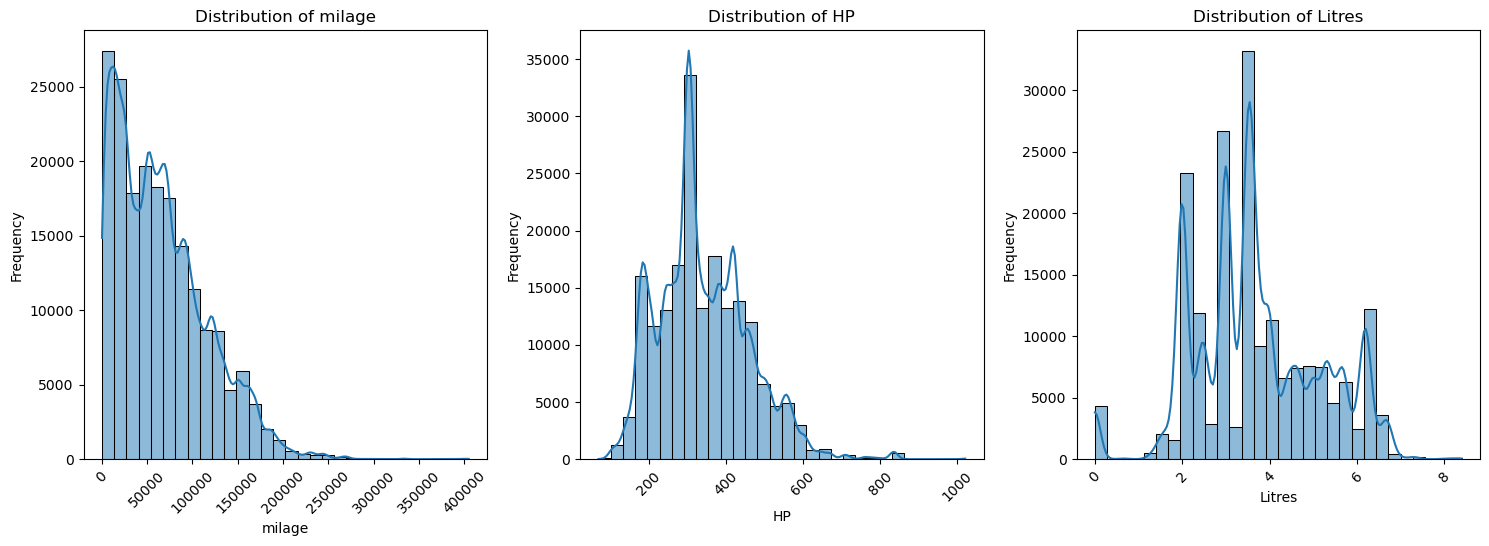

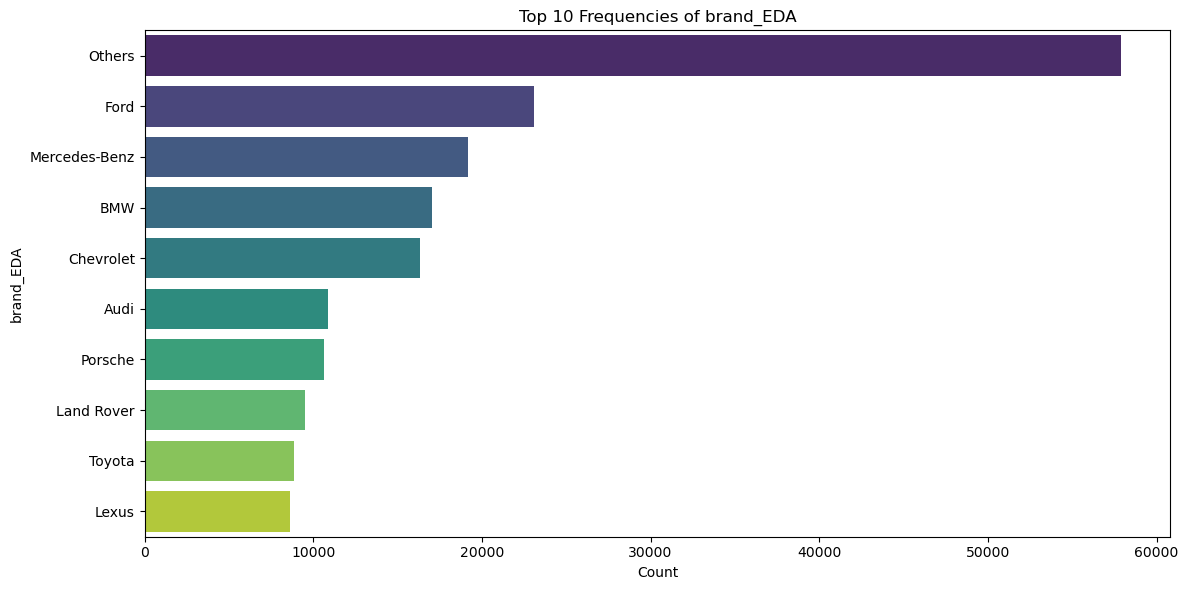

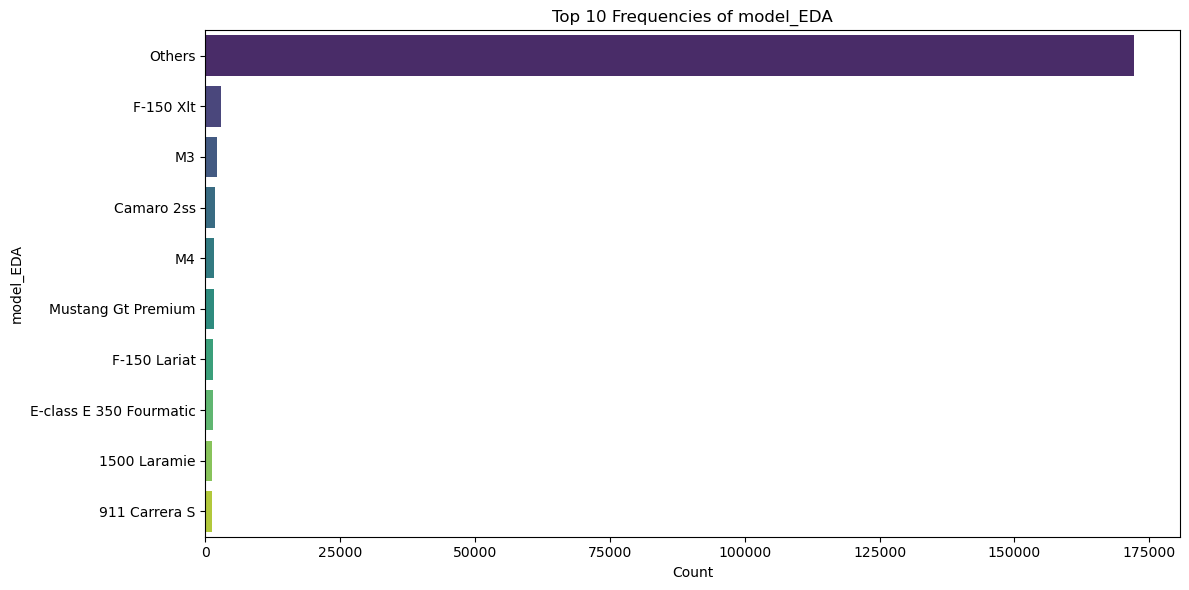

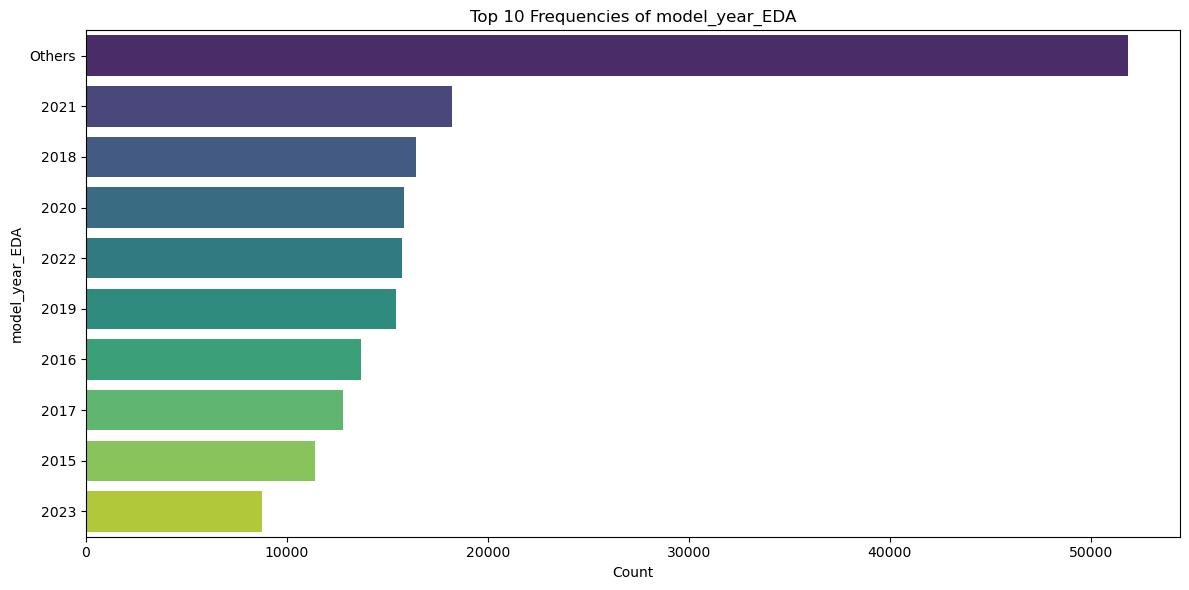

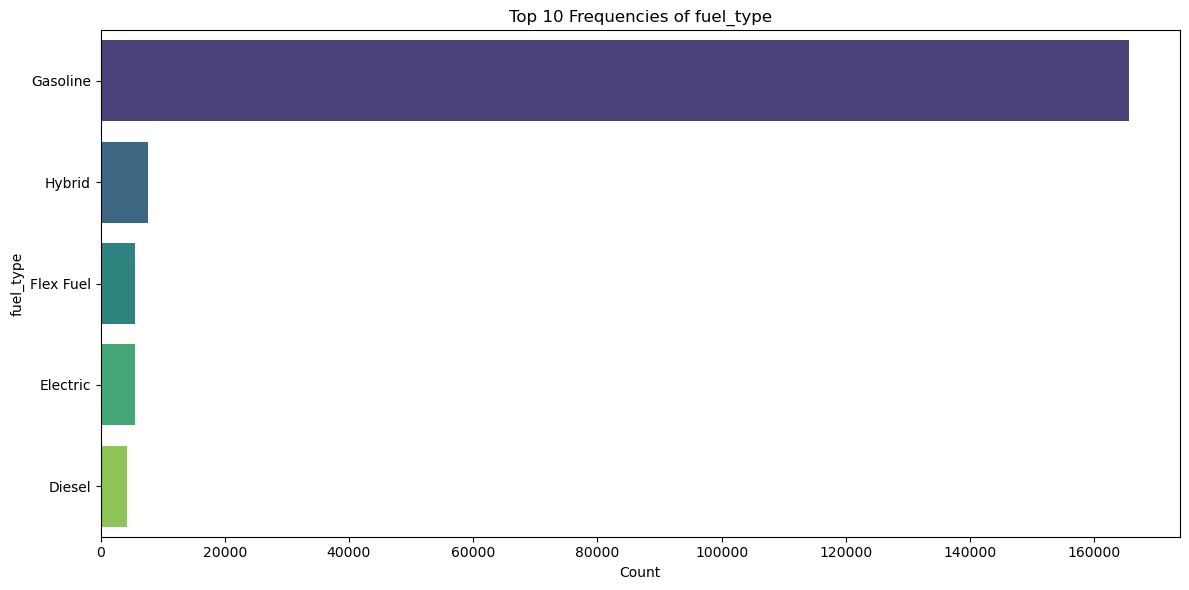

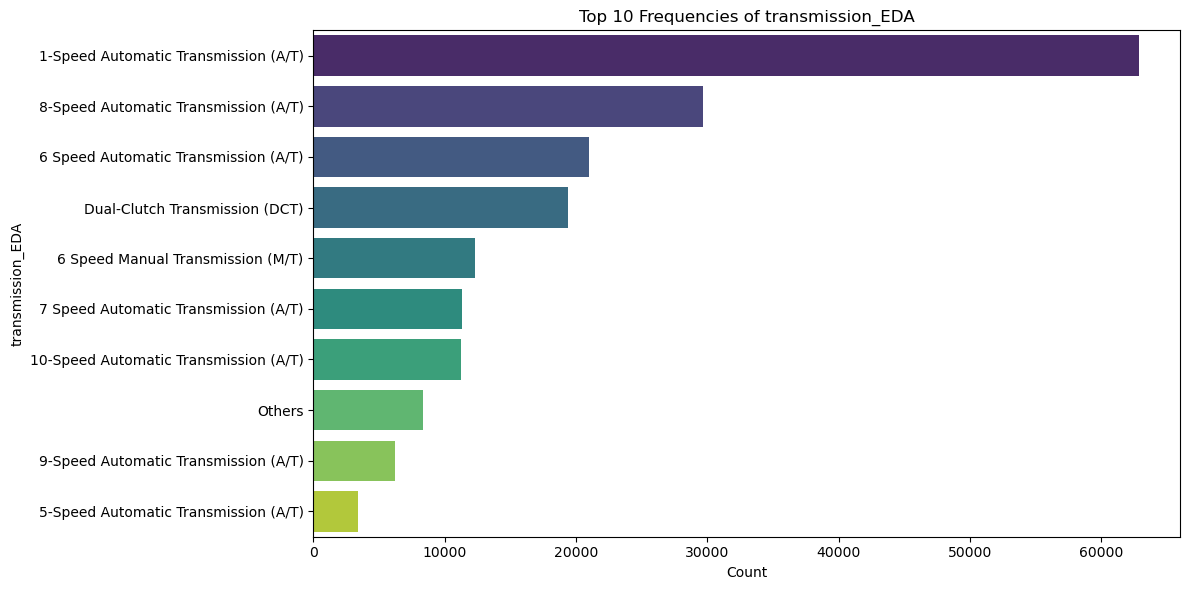

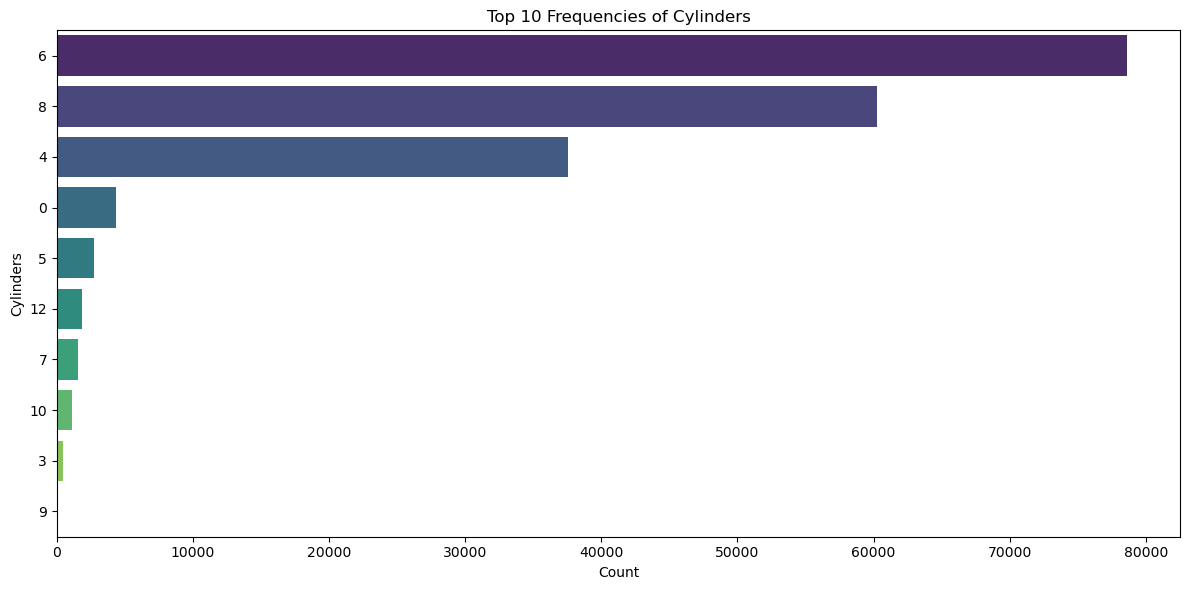

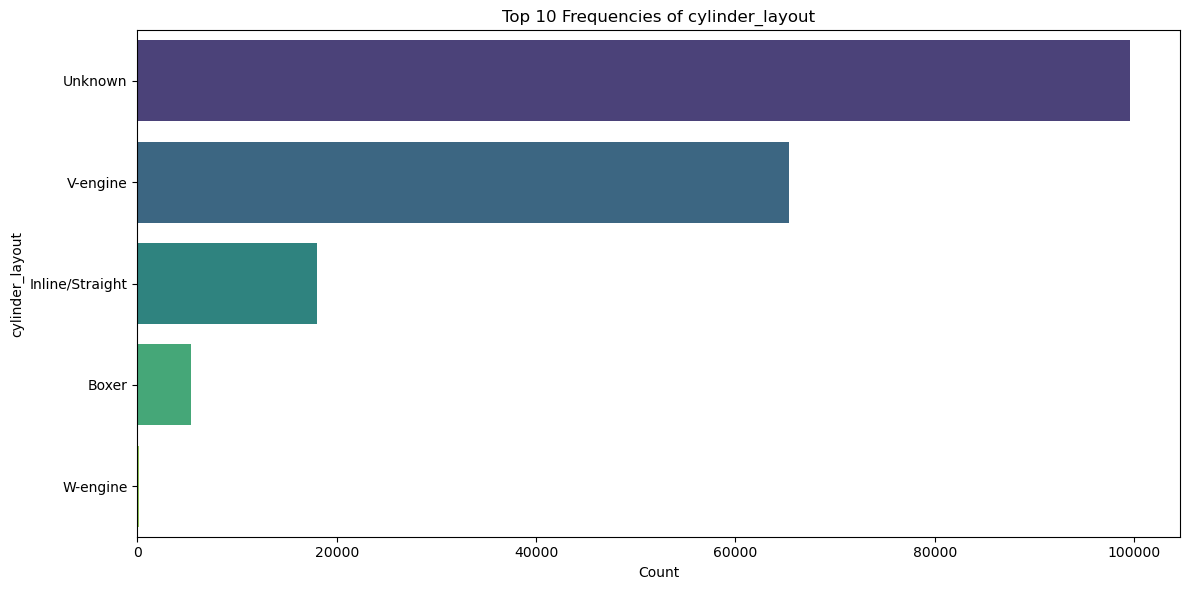

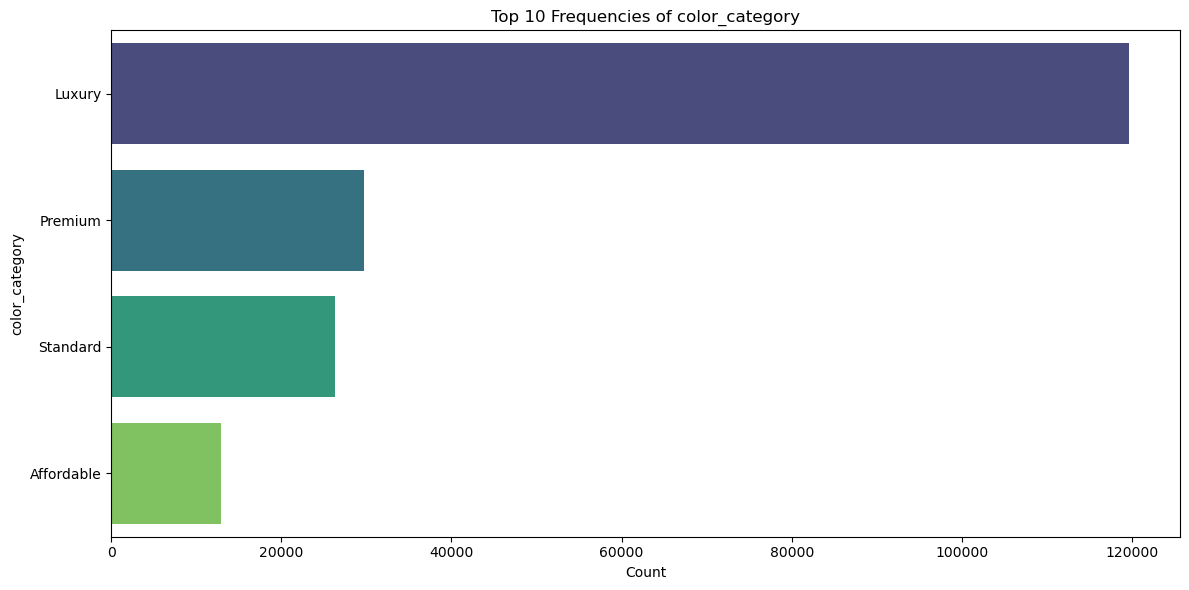

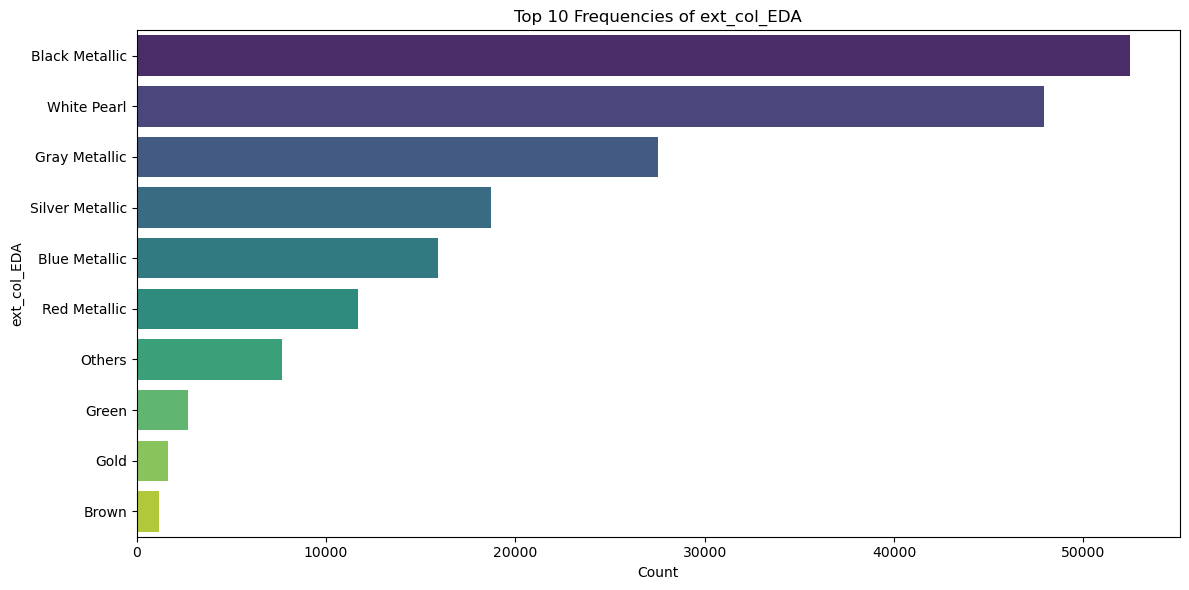

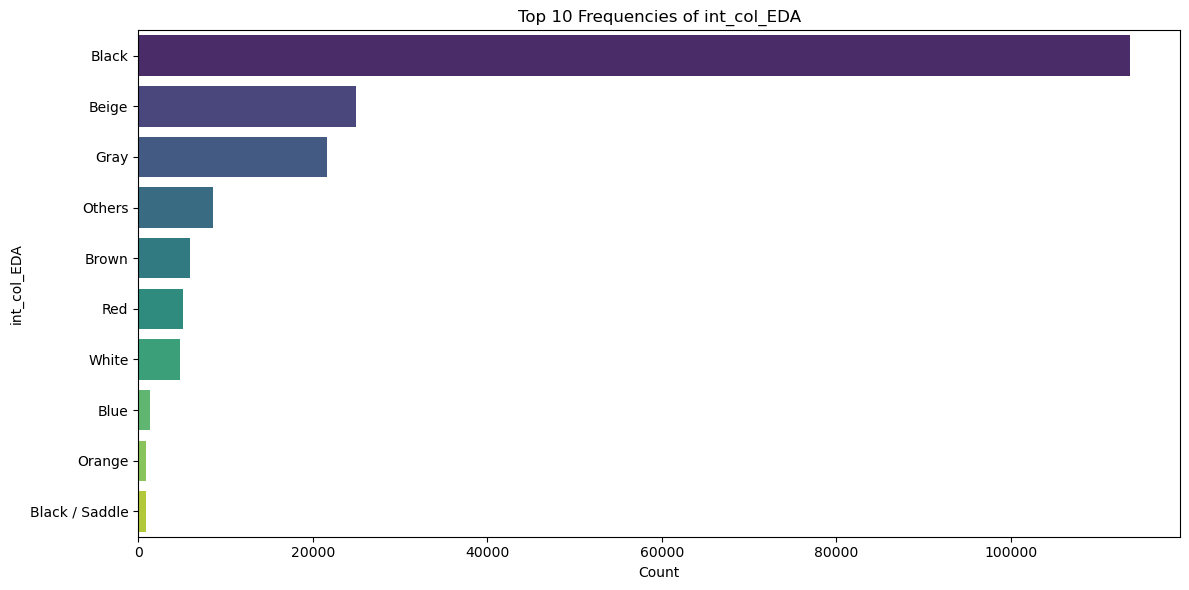

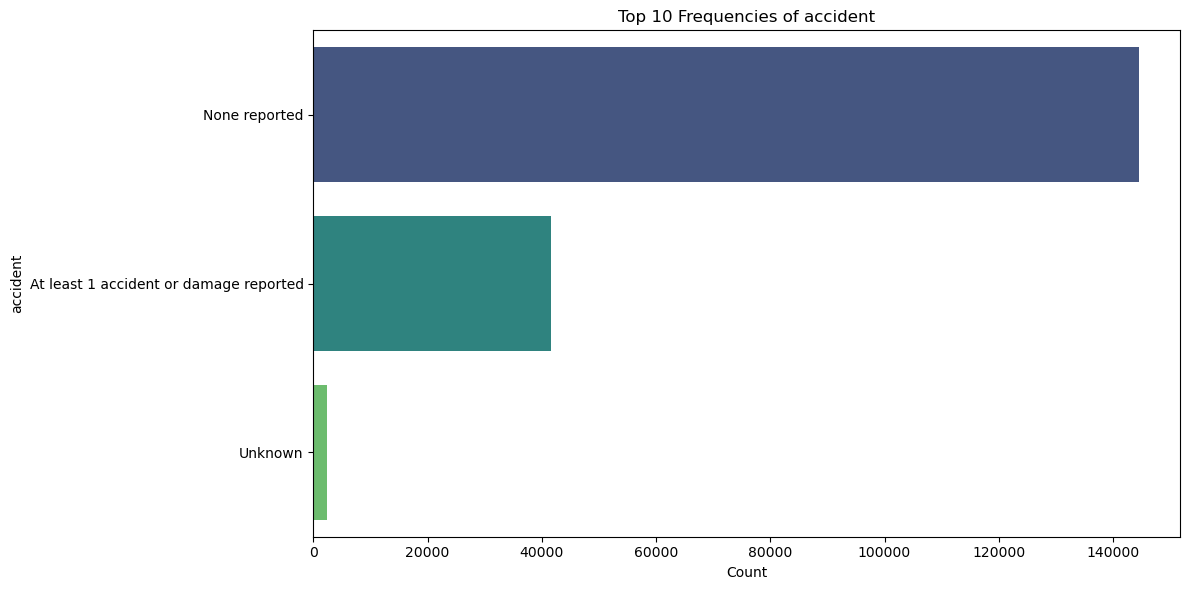

In [ ]:
numerical_cols = numerical_variables
categorical_cols = categorical_variables



print("Numerical Columns for Visualization:", numerical_cols)
print("Categorical Columns for Visualization:", categorical_cols)

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30,)
    plt.title(f'Distribution of {col}') # Set title for each subplot
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create bar plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], y=col, order=top_categories, palette='viridis')
    plt.title(f'Top 10 Frequencies of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
df['Cylinders'].unique()

array([ 4,  8,  6,  0, 10, 12,  5,  3,  7,  9,  1,  2, 16], dtype=int64)

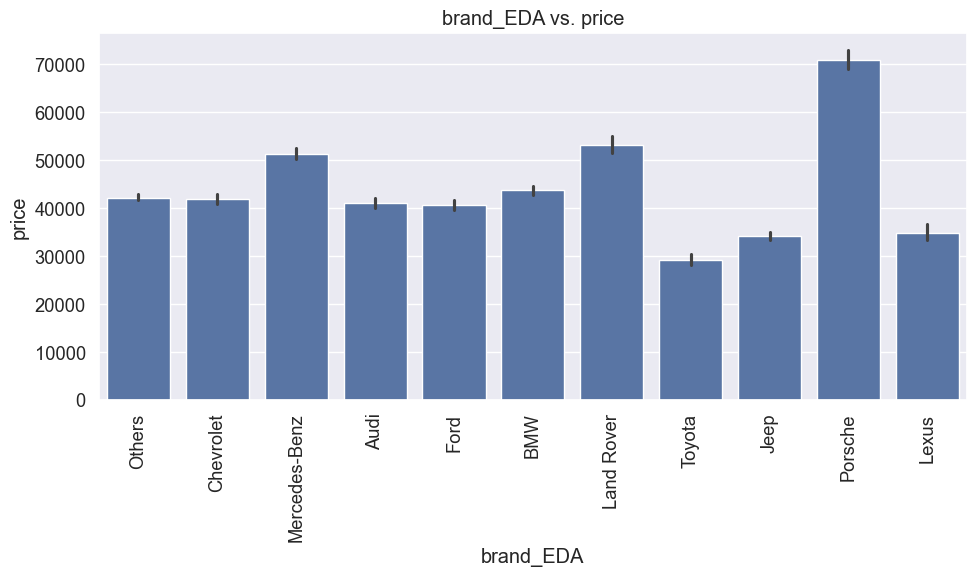

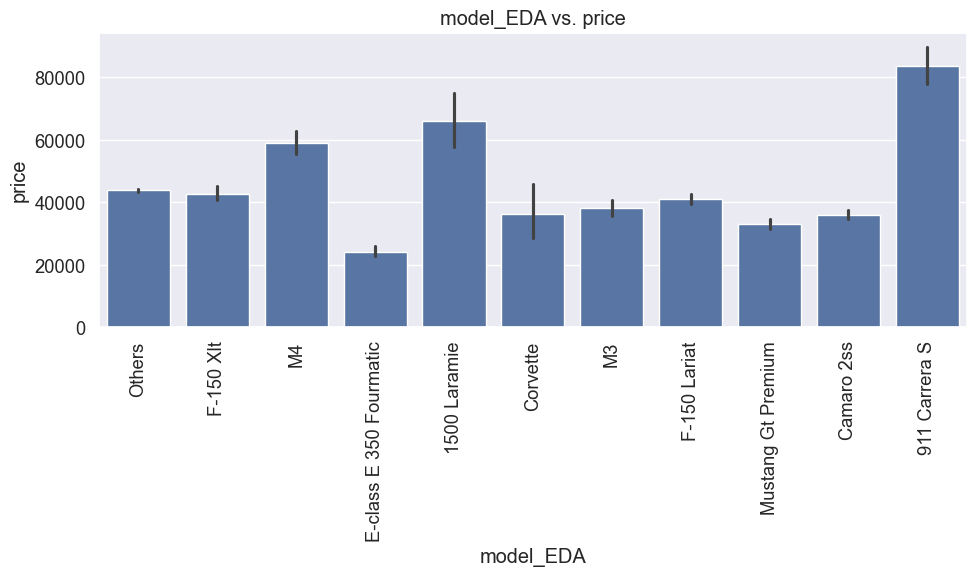

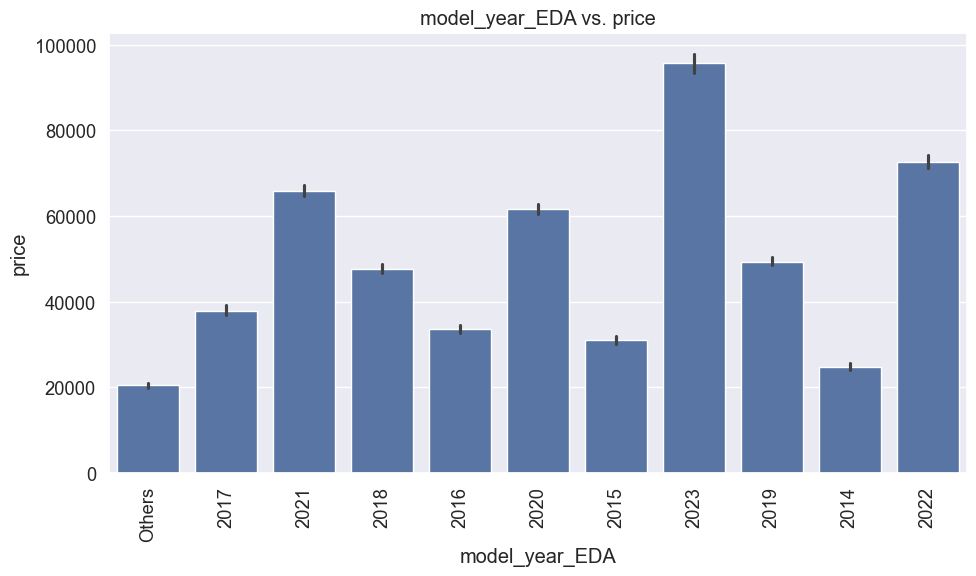

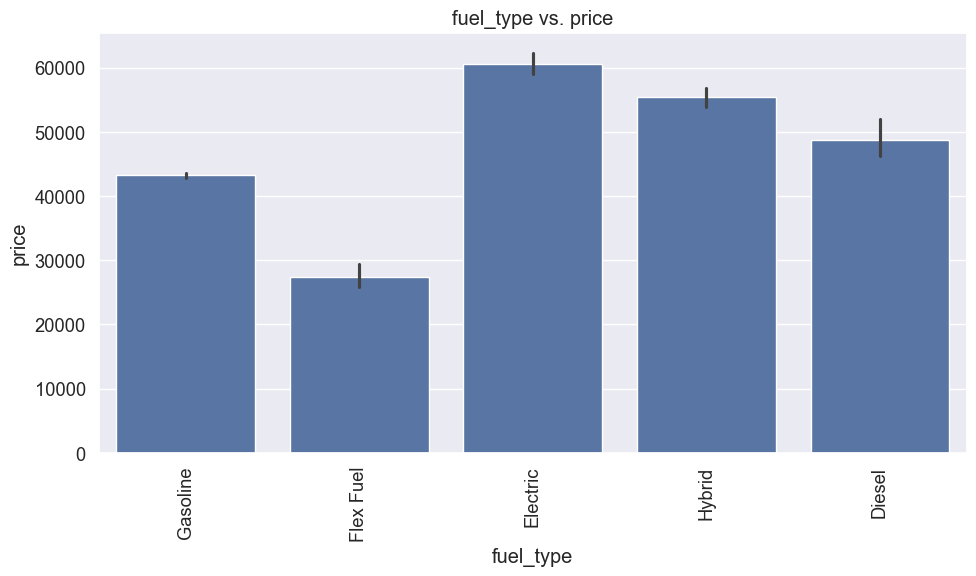

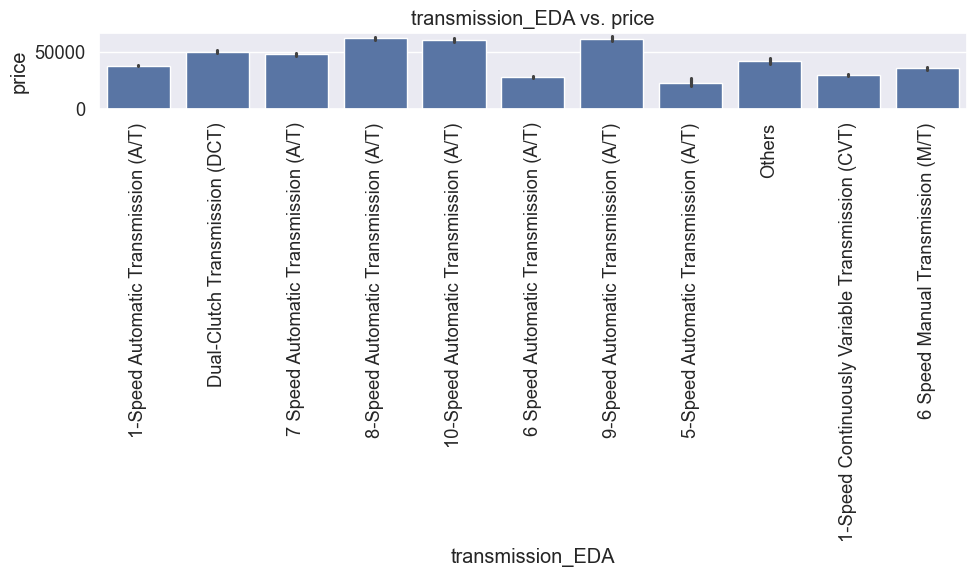

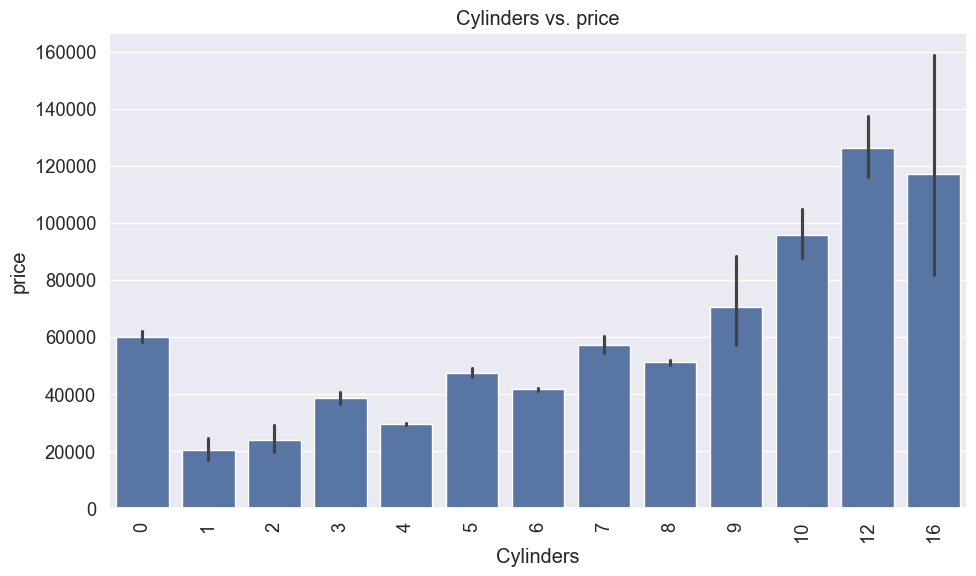

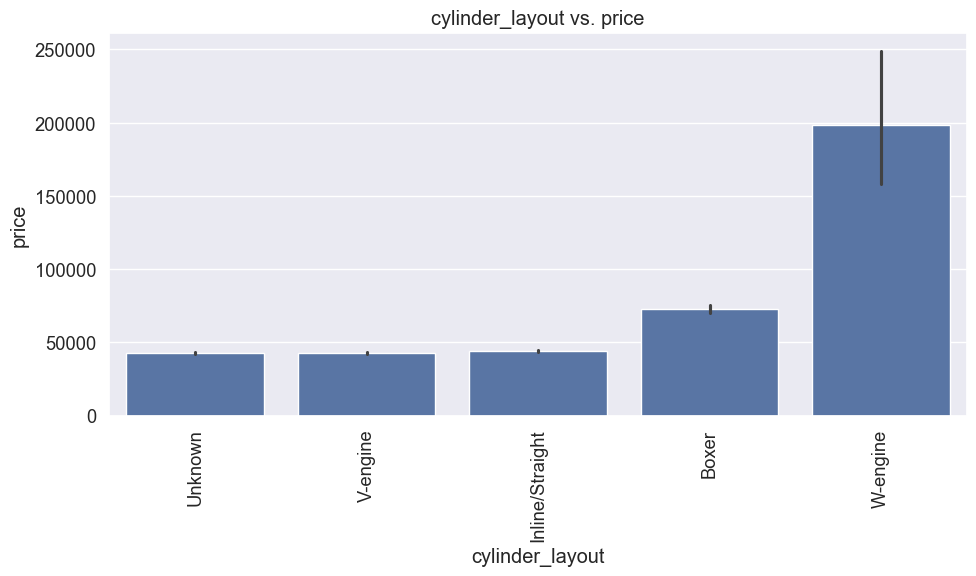

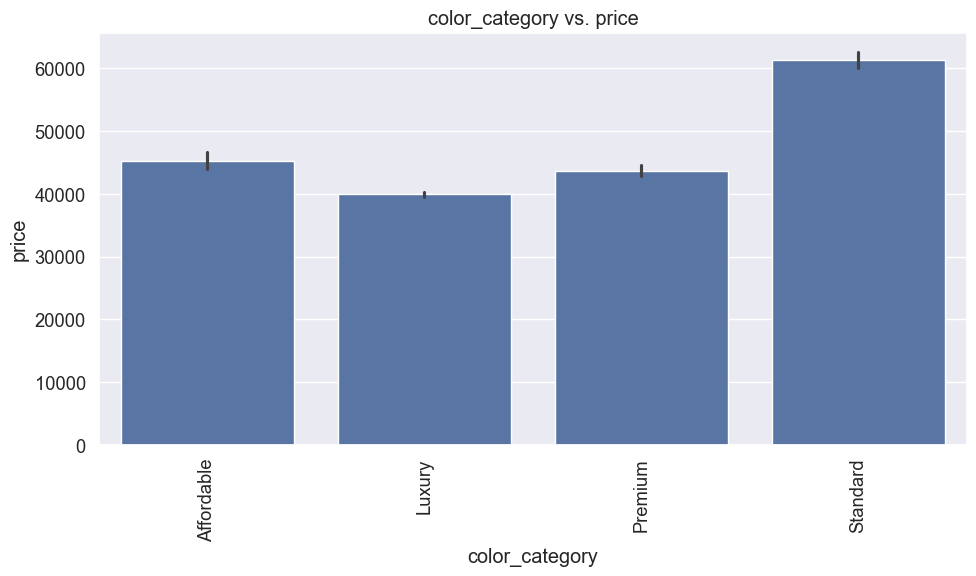

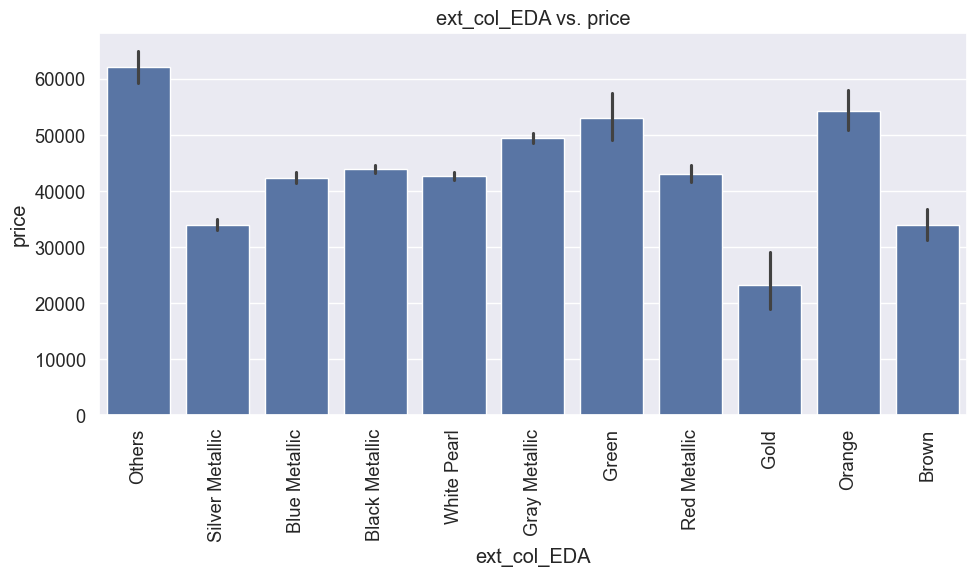

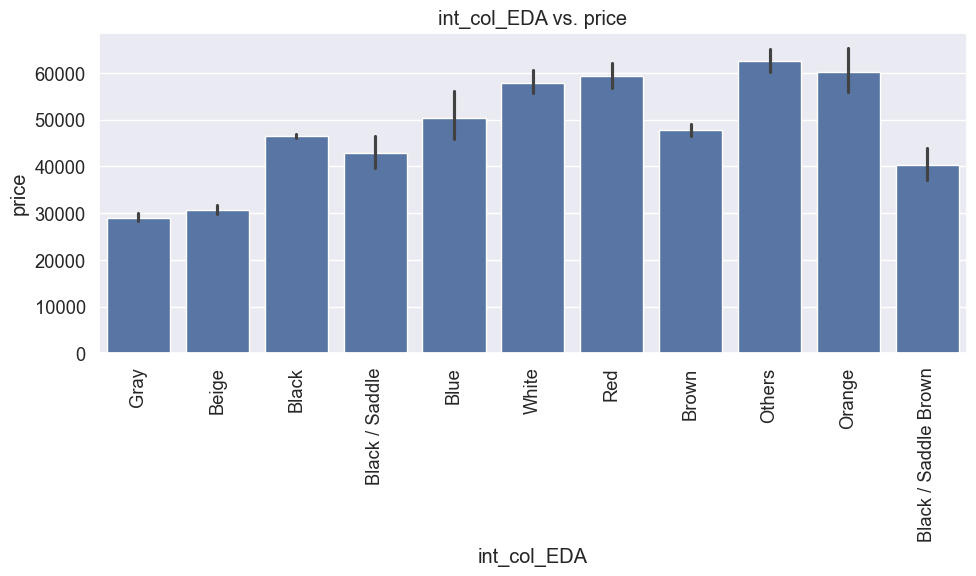

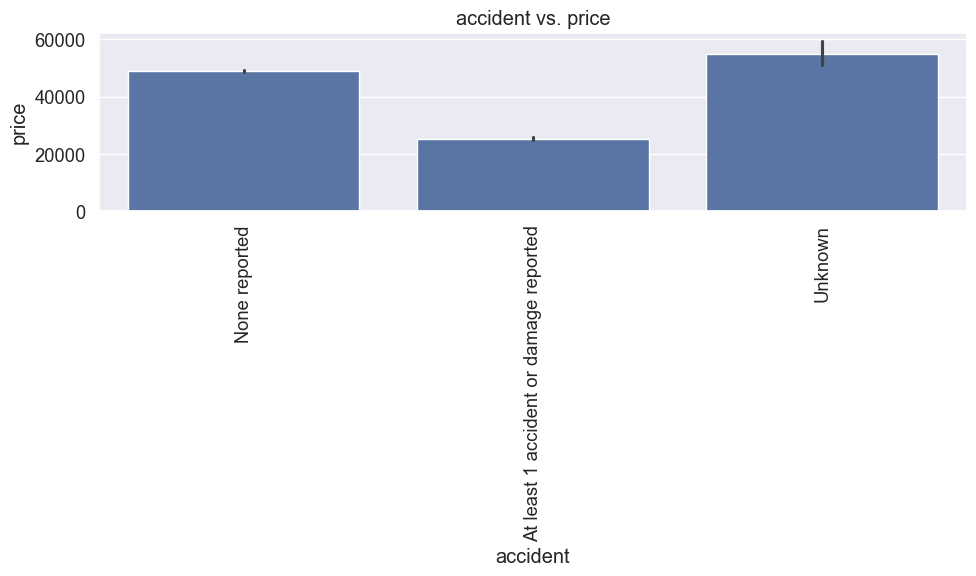

In [ ]:
# Set Seaborn font scale for better readability
sns.set(font_scale=1.2)

# 2. Categorical Variables vs. Target Variable (Box Plots)
for cat_var in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=cat_var, y=Target_Variable)
    plt.title(f'{cat_var} vs. {Target_Variable}')
    plt.xlabel(cat_var)
    plt.ylabel(Target_Variable)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

In [ ]:
### Numerical variable vs Target variable

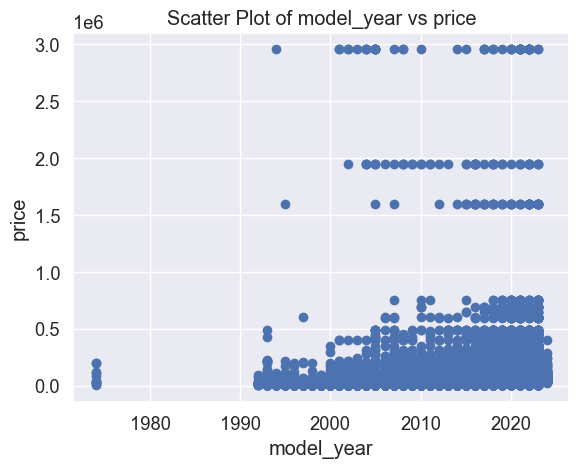

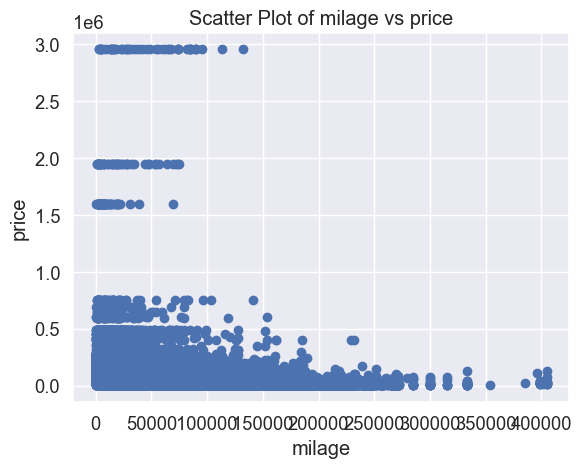

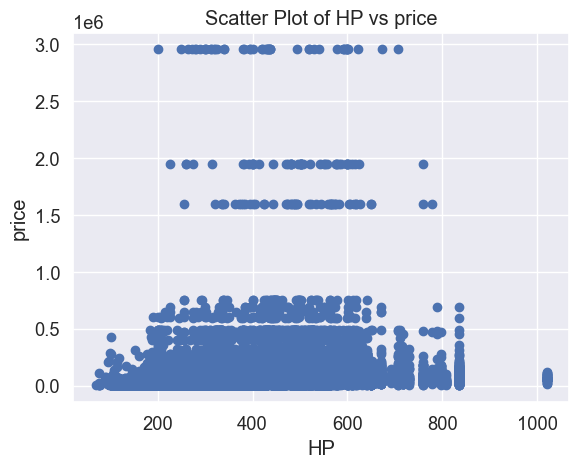

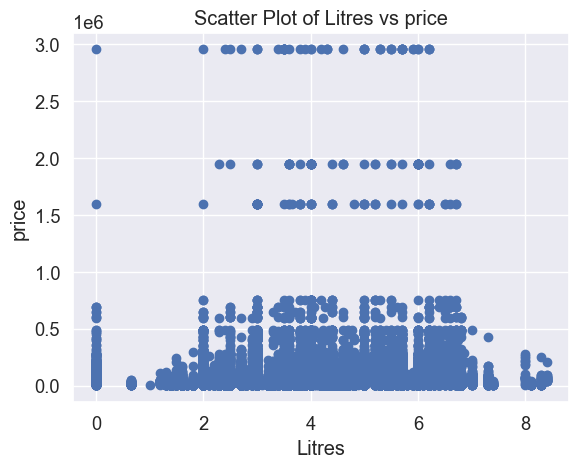

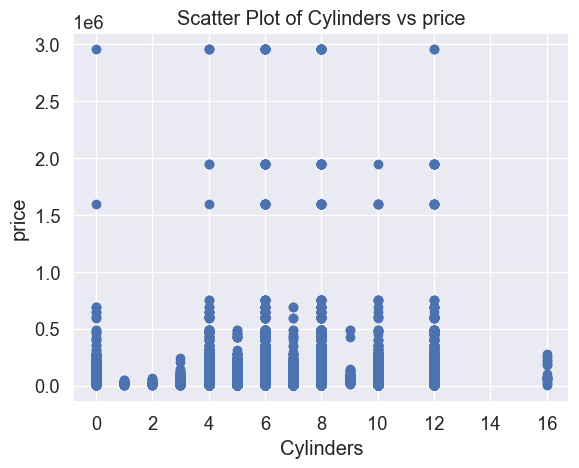

In [ ]:
# Define the numerical for analysis
numerical_columns      =  list(num_columns)
numerical_columns.remove('price')
for  var in numerical_columns :
    plt.scatter(df[var], df['price'])
    plt.xlabel(var)
    plt.ylabel('price')
    plt.title('Scatter Plot of %s vs price'%(var))
    plt.show()

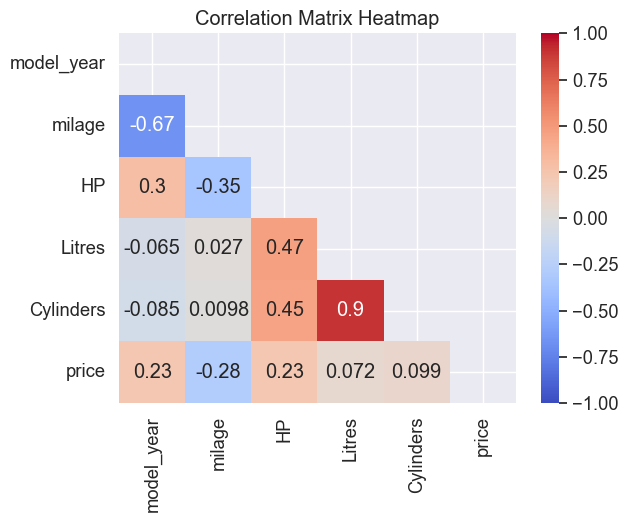

In [ ]:
correlation_matrix = num_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # True for upper triangle, False for lower triangle
sns.heatmap(correlation_matrix, annot  = True, mask=mask,cmap = 'coolwarm',vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

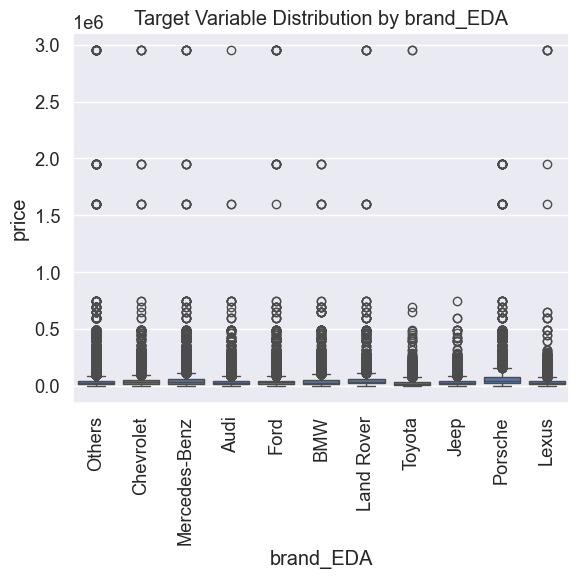

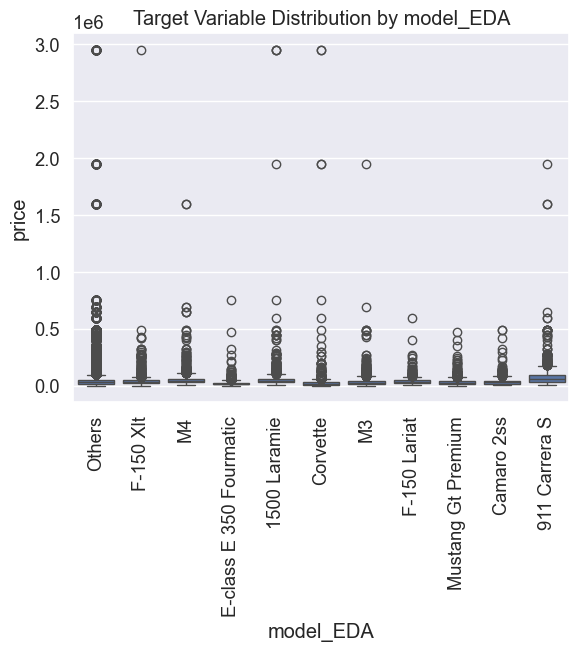

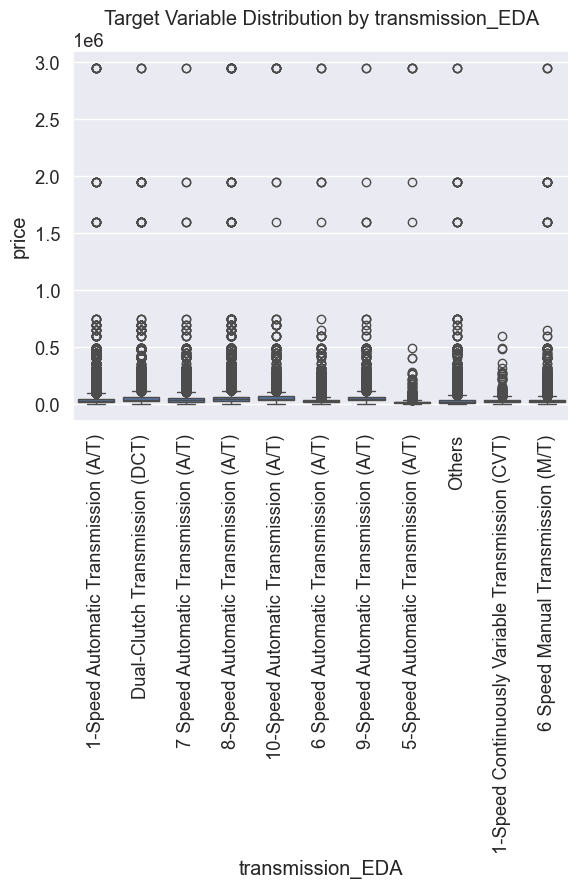

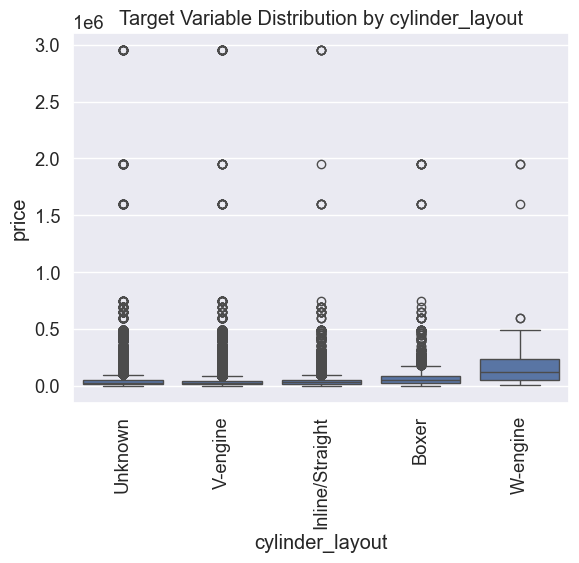

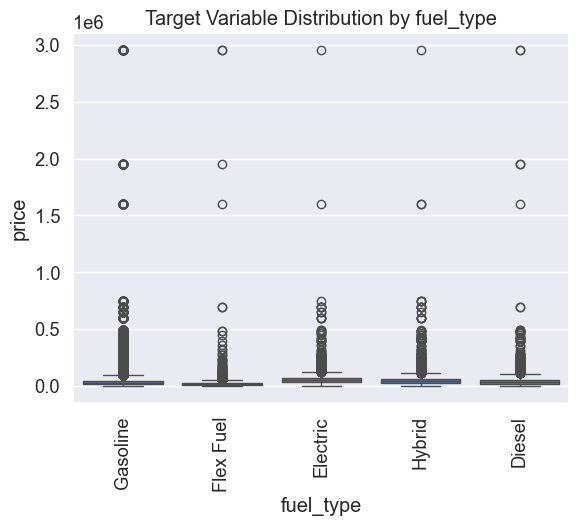

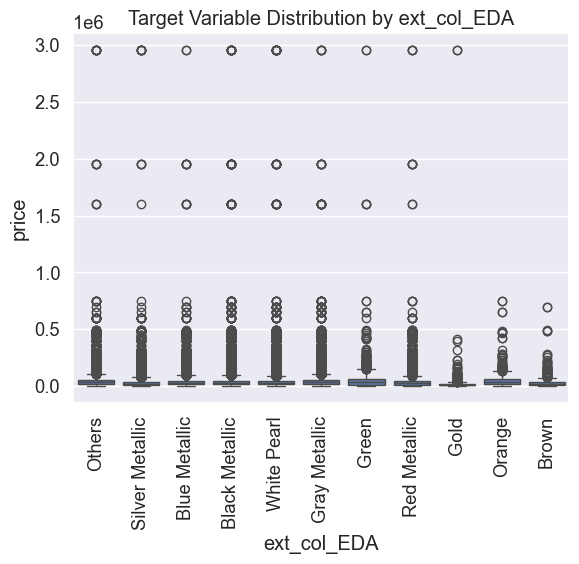

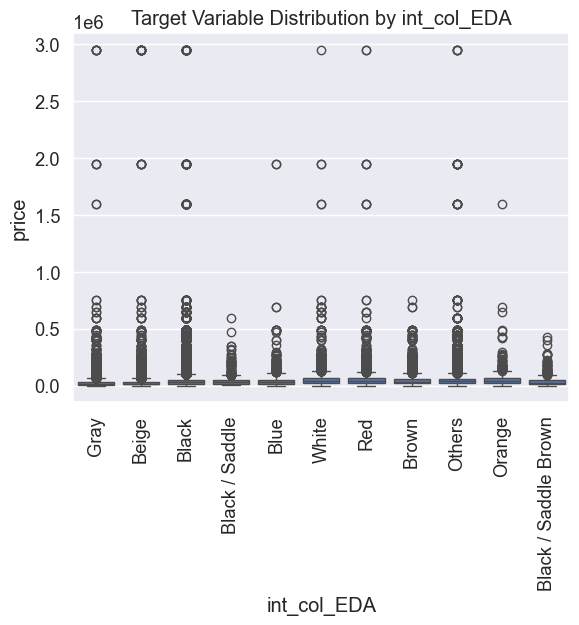

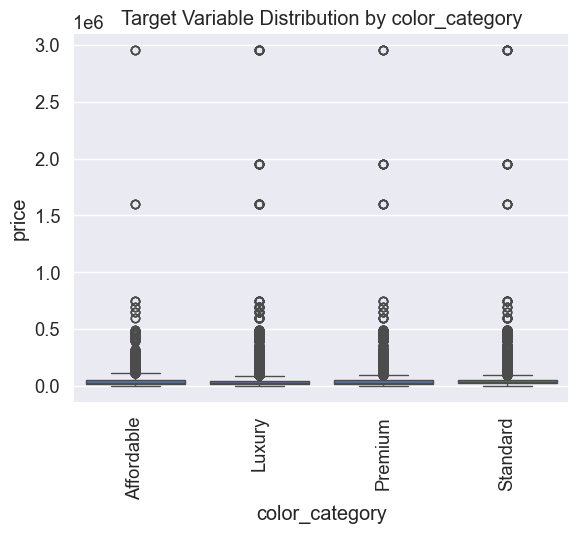

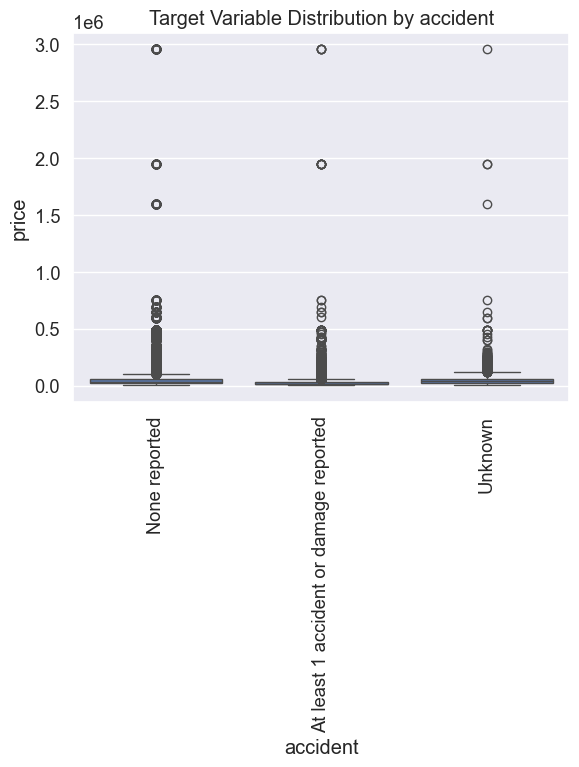

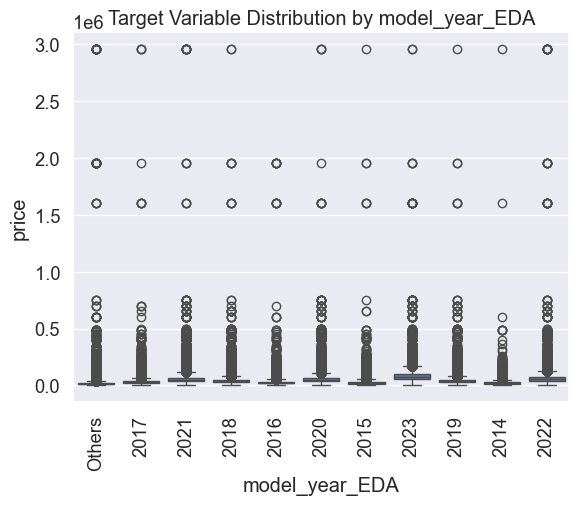

In [ ]:
target    =   'price'
for  i, var in enumerate(cat_columns_EDA) :
    sns.boxplot(x = var,  y = target, data = df)
    titlx  =   'Target Variable Distribution by ' + var
    plt.xticks(rotation = 90)
    plt.title(titlx)
    plt.show()

#### 3.4 Checking for presence of outliers and its treatment

Summary on Outlier Treatment:

Outliers can significantly affect the mean and standard deviation, leading to increased error variance and reduced power in statistical tests. Identifying outliers is essential for improving model accuracy, especially in continuous numerical variables, where they distort central tendency measures. Outlier detection can be done using visual methods like box plots or statistical techniques such as z-scores. While discrete variables are less affected, outliers should still be addressed if they are physically possible. The primary goal of outlier treatment is to ensure more reliable analysis and robust machine learning models.(CHECKED ROBUST IS WRONG)

Continuous numerical variables are those that can take on any value within a given range, like height, weight, or temperature. The mean, median, etc., are single values that summarize the data, not variables themselves.

In [ ]:
num_cols   =  ['model_year', 'milage', 'HP', 'Litres', 'Cylinders', 'price']

In [ ]:
for i in num_cols:
    print(i)
    print(df[i].unique())

model_year
[2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 2022 2003 2005 2001 2006 2000 2010 2004 1997 1998 1999 1994
 1993 1996 1995 2024 1974 1992]
milage
[213000 143250 136731 ...   4721   2922 134603]
HP
[172.         252.         320.         ... 509.16751353 181.46053244
 302.17566335]
Litres
[1.6        3.9        5.3        ... 4.44530861 4.48844932 4.51100371]
Cylinders
[ 4  8  6  0 10 12  5  3  7  9  1  2 16]
price
[ 4200  4999 13900 ... 33498 81998 13310]


In [ ]:
df.loc[:, num_cols].head()

,model_year,milage,HP,Litres,Cylinders,price
0,2007,213000,172.0,1.6,4,4200
1,2002,143250,252.0,3.9,8,4999
2,2002,136731,320.0,5.3,8,13900
3,2017,19500,420.0,5.0,8,45000
4,2021,7388,208.0,2.0,4,97500


In [ ]:
df['Litres'].min()

0.0

In [ ]:
num_cols_box   =  ['milage', 'HP', 'Litres', 'price']


1:variable, milage

Feature :milage Lower_quartile: 82812.5 ,Upper_quartile: 202327.5 

Max value: 405000 Minimum value: 100

Greater than UpperIQR : 1766, Less than lower_IQR : 0 ,  zero_count:  0

Variable milage has outliers


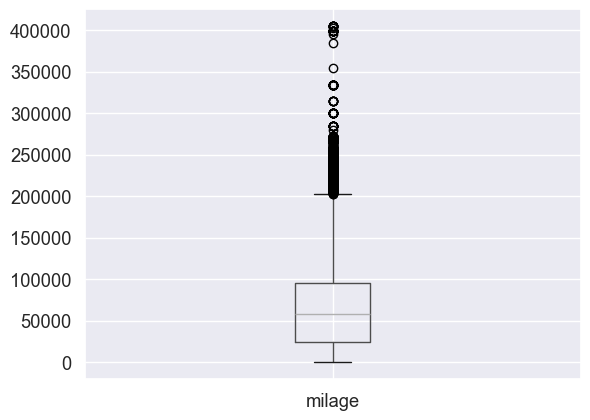


2:variable, HP

Feature :HP Lower_quartile: 20.0 ,Upper_quartile: 660.0 

Max value: 1020.0 Minimum value: 70.0

Greater than UpperIQR : 1582, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable HP has outliers


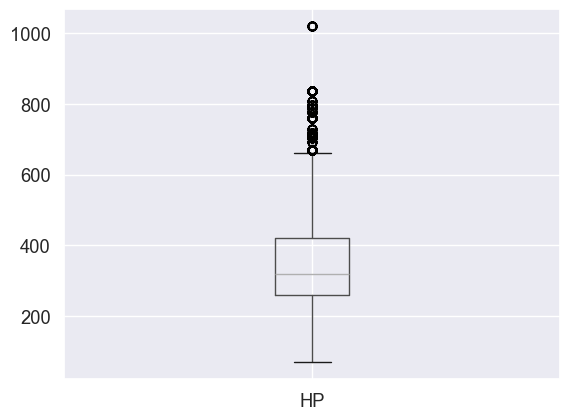


3:variable, Litres

Feature :Litres Lower_quartile: 0.19999999999999973 ,Upper_quartile: 7.4 

Max value: 8.4 Minimum value: 0.0

Greater than UpperIQR : 124, Less than lower_IQR : 4345 ,  zero_count:  0.0

Variable Litres has outliers


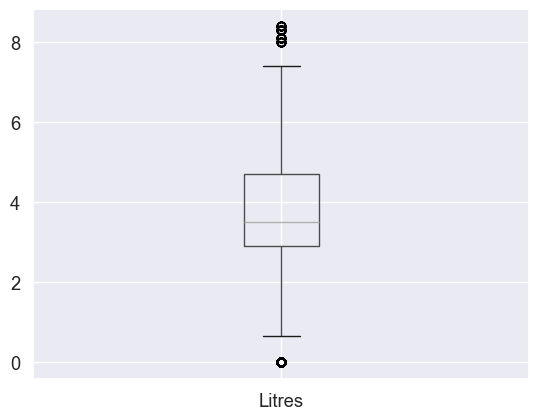


4:variable, price

Feature :price Lower_quartile: 32350.0 ,Upper_quartile: 99250.0 

Max value: 2954083 Minimum value: 2000

Greater than UpperIQR : 10880, Less than lower_IQR : 0 ,  zero_count:  0

Variable price has outliers


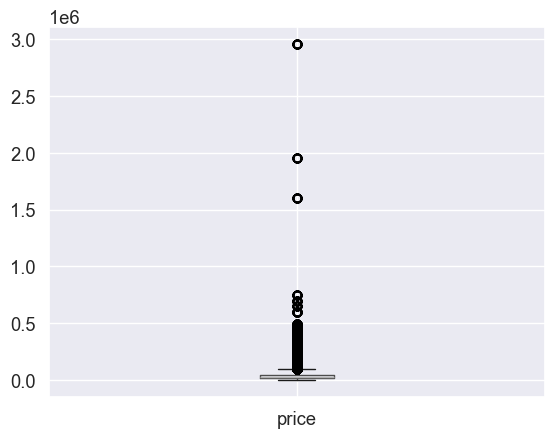

In [ ]:
for  i, var in enumerate(num_cols_box):
     sln    =  i + 1
     print("\n{0}:variable, {1}".format(sln, var))
     identify_outliers(df, var)
     plt.show()

In [ ]:
milage_ul           =  get_upper(df, "milage")
df["milage"]        =  np.where(df["milage"] > milage_ul, milage_ul, df['milage'])
###
HP_ul               =  get_upper(df, "HP")
df["HP"]            =  np.where(df["HP"] > HP_ul, HP_ul, df['HP'])
###
Litres_ul           =  get_upper(df, "Litres")
df["Litres"]        =  np.where(df["Litres"] > Litres_ul, Litres_ul, df['Litres'])
Litres_ll           =  get_lower(df, "Litres")
df["Litres"]        =  np.where(df["Litres"] < Litres_ll, Litres_ll, df['Litres'])
###
price_ul            =  get_upper(df, "price")
df["price"]         =  np.where(df["price"] > price_ul, price_ul, df['price'])



1:variable, milage

Feature :milage Lower_quartile: 82812.5 ,Upper_quartile: 202327.5 

Max value: 202327.5 Minimum value: 100.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable milage has NO outliers


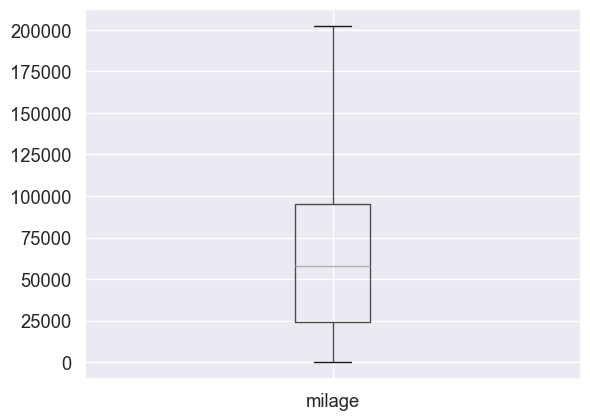


2:variable, HP

Feature :HP Lower_quartile: 20.0 ,Upper_quartile: 660.0 

Max value: 660.0 Minimum value: 70.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable HP has NO outliers


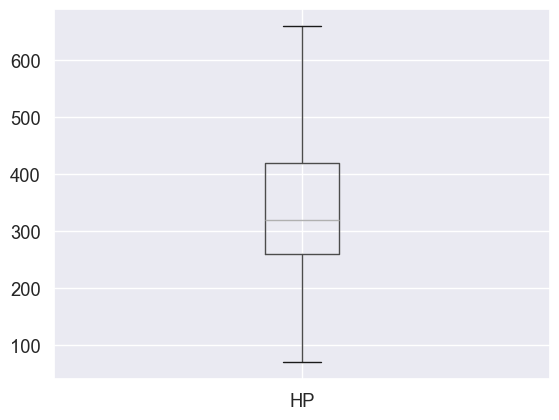


3:variable, Litres

Feature :Litres Lower_quartile: 0.19999999999999973 ,Upper_quartile: 7.4 

Max value: 7.4 Minimum value: 0.19999999999999973

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable Litres has NO outliers


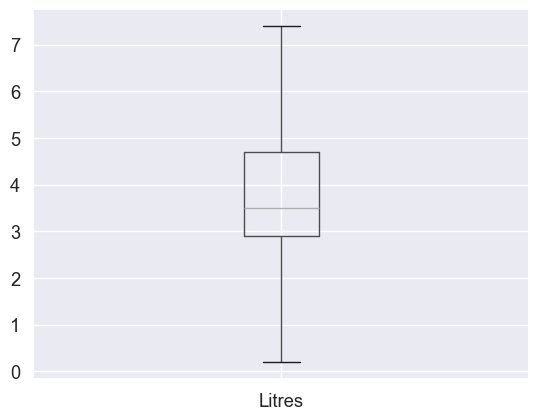


4:variable, price

Feature :price Lower_quartile: 32350.0 ,Upper_quartile: 99250.0 

Max value: 99250.0 Minimum value: 2000.0

Greater than UpperIQR : 0, Less than lower_IQR : 0 ,  zero_count:  0.0

Variable price has NO outliers


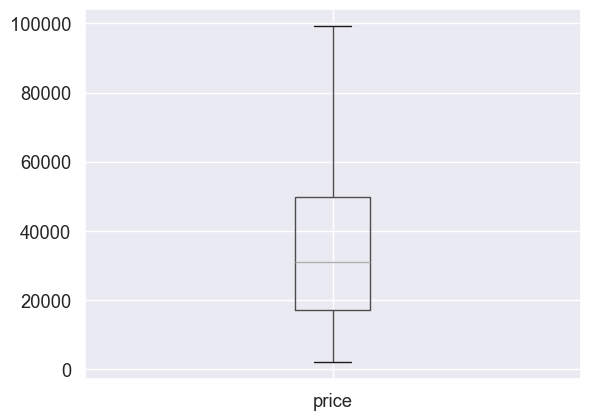

In [ ]:
num_cols1                    =  ['milage', 'HP', 'Litres', 'price']
for  i, var in enumerate(num_cols1):
     sln    =  i + 1
     print("\n{0}:variable, {1}".format(sln, var))
     identify_outliers(df, var)
     plt.show()

In [ ]:
#### 3.5	Checking for statistical significance of variables

#### a) Numerical variables
The **Shapiro-Wilk test** is used to determine if a sample of data comes from a normally distributed population. It is particularly useful for smaller sample sizes (typically less than 50).
Alternatives to the Shapiro-Wilk test:
**Kolmogorov-Smirnov test**: This test can be used for larger sample sizes (n ≥ 50).

### Check if there's a statistically significant difference between the means of two groups
Parametric tests such as t tests are based on certain assumptions. They assume that the data follows a specific distribution, typically a normal distribution.
On the other hand, non-parametric tests do not make these assumptions about the underlying distributions and are often used when the data does not meet the requirements of parametric tests. They are sometimes referred to as distribution-free tests. This makes them more flexible and applicable in a wider range of situations, especially when dealing with non-normal distributions.

The Kruskal–Wallis test is a statistical test used to compare two or more groups for a continuous or discrete variable. It is a non-parametric test, meaning that it assumes no particular distribution of your data and is analogous to the one-way analysis of variance (ANOVA). The Kruskal Wallis test is sometimes referred to as the one-way ANOVA on ranks or the Kruskal Wallis one-way ANOVA.

The hypotheses of the Kruskal–Wallis test are as follows:

The $H_0$ - null hypothesis () is that the population medians are equal.

The $H_A$ - alternative hypothesis () is that the population medians are not equal, or that the population median differs from the population median of one of the other groups.

In [ ]:
# Define the numerical and categorical columns for analysis
for var in cat_columns_EDA :
    chk_kruskal(df, var, target)


At least one group stands out from the rest, brand_EDA 

At least one group stands out from the rest, model_EDA 

At least one group stands out from the rest, transmission_EDA 

At least one group stands out from the rest, cylinder_layout 

At least one group stands out from the rest, fuel_type 

At least one group stands out from the rest, ext_col_EDA 

At least one group stands out from the rest, int_col_EDA 

At least one group stands out from the rest, color_category 

At least one group stands out from the rest, accident 

At least one group stands out from the rest, model_year_EDA 


In [ ]:
for var in cat_columns_EDA :
    dunns_post_hoc(df, var, target)

                        Audi            BMW      Chevrolet           Ford  \
Audi            1.000000e+00   3.647001e-07   1.000000e+00   1.000000e+00   
BMW             3.647001e-07   1.000000e+00   5.375899e-06   2.768910e-06   
Chevrolet       1.000000e+00   5.375899e-06   1.000000e+00   1.000000e+00   
Ford            1.000000e+00   2.768910e-06   1.000000e+00   1.000000e+00   
Jeep            1.302726e-27   8.074801e-63   2.763066e-36   5.610460e-41   
Land Rover     4.506395e-107   1.357044e-76  1.425963e-116  1.000092e-127   
Lexus           2.123561e-57  4.143991e-116   6.989128e-75   1.455308e-85   
Mercedes-Benz   7.789148e-85   6.470090e-54   2.113313e-96  4.497394e-111   
Others          3.201042e-26   6.250828e-99   4.451207e-45   1.766150e-61   
Porsche        1.774249e-280  2.743059e-249   0.000000e+00   0.000000e+00   
Toyota         7.247392e-184  1.352803e-300  1.300893e-229  7.315886e-260   

                        Jeep     Land Rover          Lexus  Mercedes-Benz  

The **D’Agostino’s K² Test** is a statistical test used to determine whether a dataset follows a normal distribution, and it’s particularly useful when you want to assess both skewness and kurtosis simultaneously.
 When to Use D’Agostino’s K² Test
* Testing for Normality in Continuous Data
Ideal when you need to validate the assumption of normality before applying parametric tests like linear regression, t-tests, or ANOVA.
* When You Suspect Skewness or Kurtosis
Unlike tests that focus on one aspect (e.g., Shapiro-Wilk for general shape), D’Agostino’s K² combines skewness and kurtosis into a single omnibus test statistic.
* Moderate to Large Sample Sizes
It performs best with n ≥ 20, and its accuracy improves with larger datasets. For very small samples, Shapiro-Wilk might be more reliable.


In [ ]:
num_cols   =  ['model_year', 'milage', 'HP', 'Litres', 'Cylinders', 'price']

In [ ]:
# Define the numerical  for analysis
df_N      =   df.loc[:, num_cols]
for var in num_cols :
    chk_dagastino(df_N, var)

Statistics=26194.461, p=0.000
Sample does not look Gaussian (reject H0) col  model_year
Statistics=14064.437, p=0.000
Sample does not look Gaussian (reject H0) col  milage
Statistics=6332.010, p=0.000
Sample does not look Gaussian (reject H0) col  HP
Statistics=2223.565, p=0.000
Sample does not look Gaussian (reject H0) col  Litres
Statistics=15699.246, p=0.000
Sample does not look Gaussian (reject H0) col  Cylinders
Statistics=21737.049, p=0.000
Sample does not look Gaussian (reject H0) col  price


In [ ]:
# the assumption of normality doesnot met so using LOG transfomer on target variable (Price)

In [ ]:
df1=df.copy()

In [ ]:
df1['price']=np.log(df1['price'])

In [ ]:
# Define the numerical  for analysis
df_N      =   df1.loc[:, num_cols]
for var in num_cols :
    chk_dagastino(df_N, var)

Statistics=26194.461, p=0.000
Sample does not look Gaussian (reject H0) col  model_year
Statistics=14064.437, p=0.000
Sample does not look Gaussian (reject H0) col  milage
Statistics=6332.010, p=0.000
Sample does not look Gaussian (reject H0) col  HP
Statistics=2223.565, p=0.000
Sample does not look Gaussian (reject H0) col  Litres
Statistics=15699.246, p=0.000
Sample does not look Gaussian (reject H0) col  Cylinders
Statistics=6192.663, p=0.000
Sample does not look Gaussian (reject H0) col  price


### Observations
Based on the The D’Agostino’s K^2 test, we find that the numeric columns in dataset does significantly deviate from normal.

#### b) Categorical variables

The $\chi^2$ - (Chi Sqaure) test of independence analysis utilizes a cross tabulation table between the variables of interest r rows and c columns.

A chi-square test is not appropriate for analyzing the relationship between categorical and numerical variables.

Based on the cell counts, it is possible to test if there is a relationship, dependence, between the variables and to estimate the strength of the relationship.

#### Assumptions

* The two samples are independent
* No expected cell count is = 0
* No more than 20% of the cells have and expected cell count < 5

### Hypothesis

Null hypothesis $H_0$: Variables are independent

Alternative hypothesis $H_1$: Variables are NOT independent

Since a chi-square test is not appropriate for analyzing the relationship between categorical and numerical variables,
we can convert the numerical target variable into a categorical variable.

Converting a continuous variable into discrete bins may lose information and introduce bias if not done carefully.
* After binning, check the distribution of observations across categories to ensure validity for the chi-square test.


In [ ]:
# Apply quantile-based binning
df['target_binned'] = pd.qcut(df[target], q=3, labels=['Low', 'Medium', 'High'])
# Display result
print(df['target_binned'].head())

0     Low
1     Low
2     Low
3    High
4    High
Name: target_binned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


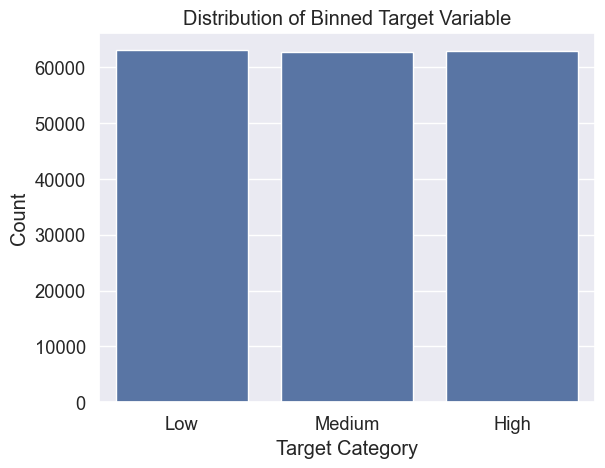

In [ ]:
# Visualize the distribution of binned target variable
sns.countplot(x='target_binned', data = df)
plt.title('Distribution of Binned Target Variable')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'transmission', 'HP',
       'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type', 'ext_col',
       'int_col', 'color_category', 'accident', 'price', 'brand_EDA',
       'model_EDA', 'ext_col_EDA', 'int_col_EDA', 'model_year_EDA',
       'transmission_EDA', 'target_binned'],
      dtype='object')

In [ ]:
cat_columns

Index(['brand', 'model', 'transmission', 'cylinder_layout', 'fuel_type',
       'ext_col', 'int_col', 'color_category', 'accident', 'brand_EDA',
       'model_EDA', 'ext_col_EDA', 'int_col_EDA', 'model_year_EDA',
       'transmission_EDA'],
      dtype='object')

In [ ]:
# Define the categorical columns for analysis
categorical_columns    =   [ 'brand_EDA', 'model_EDA', 'transmission_EDA', 'cylinder_layout', 'fuel_type', 'ext_col_EDA', 'int_col_EDA',\
                            'color_category', 'accident','model_year_EDA']
for i, var in enumerate(categorical_columns):
    i += 1
    chk_chisq(df, i, var, 'target_binned')


1: Variable, brand_EDA

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=6845.78382504452, pvalue=0.0, dof=20, expected_freq=array([[ 3639.37500597,  3619.45268468,  3628.17230936],
       [ 5692.22720691,  5661.06735691,  5674.70543618],
       [ 5460.56679732,  5430.67508076,  5443.75812192],
       [ 7718.67078973,  7676.41797457,  7694.9112357 ],
       [ 2165.17239953,  2153.32001825,  2158.50758223],
       [ 3184.74563074,  3167.31199843,  3174.94237083],
       [ 2889.90510945,  2874.08546514,  2881.00942541],
       [ 6408.9370455 ,  6373.85385052,  6389.20910398],
       [19358.51994081, 19252.54936802, 19298.93069118],
       [ 3547.44627201,  3528.02717827,  3536.52654973],
       [ 2958.43380204,  2942.23902447,  2949.32717349]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,brand_EDA and Target var

#### 3.6	Checking for class imbalance and its treatment

Since our target variable is a continous numerical variable, there is no question of class imbalance.

## 4) Feature Engineering
Recursive Feature Elimination Made Simple: How To Tutorial
Recursive Feature Elimination (RFE) is a wrapper method used in machine learning for feature selection. In regression problems, RFE helps identify the most important features for predicting a continuous target variable by iteratively removing less significant features. It works by building a model, assessing feature importance, and then removing the least important features, repeating this process until the desired number of features is reached.


Here's a breakdown of how RFE works in regression:
1. Model Initialization: RFE starts by training a model (e.g., linear regression, support vector regression) on the entire set of features.
2. Feature Importance: The model is used to evaluate the importance of each feature. Different models provide feature importance in different ways. For example, linear models use coefficients, while tree-based models use feature importances.
3. Feature Elimination: The feature with the lowest importance score is removed.
4. Iteration: Steps 2 and 3 are repeated with the reduced feature set. This process continues until the desired number of features is reached or a stopping criterion is met.
5. Selected Features: RFE outputs the subset of features that were deemed most important and were retained throughout the process.

Advantages of using RFE:

Improved Model Performance:
By removing irrelevant features, RFE can help reduce overfitting and improve the generalization ability of the model.
Reduced Dimensionality:
RFE can simplify the model by reducing the number of input features, making it easier to interpret and faster to train.
Feature Importance:
RFE provides insights into which features are most important for the model's predictio

Data transformation is used when data needs to be converted to match that of the destination system.
We have created a few columns from the existing columns.
## 4.1) Whether any transformations required

We have performed label encoding to make our data suitable for model building.

## 4.2) Scaling the data
In Data Processing, we try to change the data in such a way that the model can process it without any problems. And Feature Scaling is one such process in which we transform the data into a better version. Feature Scaling is done to normalize the features in the dataset into a finite range.

In [ ]:
df_numeric = df.filter(['milage', 'price'], axis = 1)
df_numeric.head()

,milage,price
0,202327.5,4200.0
1,143250.0,4999.0
2,136731.0,13900.0
3,19500.0,45000.0
4,7388.0,97500.0


Let’s plot some statistical values for the columns in our dataset using the describe() method.

In [ ]:
df_numeric.describe()

,milage,price
count,188533.000000,188533.000000
mean,65397.767531,37203.735537
std,48748.009000,25835.226624
min,100.000000,2000.000000
25%,24115.000000,17000.000000
50%,57785.000000,30825.000000
75%,95400.000000,49900.000000
max,202327.500000,99250.000000


In [ ]:
without_scaled=df.copy()
without_scaled.head()

,brand,model,model_year,milage,transmission,HP,Litres,Cylinders,cylinder_layout,fuel_type,...,color_category,accident,price,brand_EDA,model_EDA,ext_col_EDA,int_col_EDA,model_year_EDA,transmission_EDA,target_binned
0,Mini,Cooper S,2007,202327.5,1-Speed Automatic Transmission (A/T),172.0,1.6,4,Unknown,Gasoline,...,Affordable,None reported,4200.0,Others,Others,Others,Gray,Others,1-Speed Automatic Transmission (A/T),Low
1,Lincoln,Ls V8,2002,143250.0,1-Speed Automatic Transmission (A/T),252.0,3.9,8,Unknown,Gasoline,...,Luxury,At least 1 accident or damage reported,4999.0,Others,Others,Silver Metallic,Beige,Others,1-Speed Automatic Transmission (A/T),Low
2,Chevrolet,Silverado 2500 Lt,2002,136731.0,1-Speed Automatic Transmission (A/T),320.0,5.3,8,Unknown,Flex Fuel,...,Premium,None reported,13900.0,Chevrolet,Others,Blue Metallic,Gray,Others,1-Speed Automatic Transmission (A/T),Low
3,Genesis,G90 5.0 Ultimate,2017,19500.0,Dual-Clutch Transmission (DCT),420.0,5.0,8,Unknown,Gasoline,...,Luxury,None reported,45000.0,Others,Others,Black Metallic,Black,2017,Dual-Clutch Transmission (DCT),High
4,Mercedes-Benz,Metris,2021,7388.0,7 Speed Automatic Transmission (A/T),208.0,2.0,4,Unknown,Gasoline,...,Luxury,None reported,97500.0,Mercedes-Benz,Others,Black Metallic,Beige,2021,7 Speed Automatic Transmission (A/T),High


In [ ]:
### MinMax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler =   MinMaxScaler()
cols          =   ['milage', 'price']
minmax_arr    =   df_numeric.to_numpy()
minmax_scaler.fit(minmax_arr)
# scale all data points using median and IQR
minmax_scaled_data =  minmax_scaler.transform(minmax_arr)

In [ ]:
minmax_df     =   pd.DataFrame(minmax_scaled_data, columns = cols)

In [ ]:
minmax_df.describe()

,milage,price
count,188533.000000,188533.000000
mean,0.322893,0.361992
std,0.241055,0.265658
min,0.000000,0.000000
25%,0.118752,0.154242
50%,0.285248,0.296401
75%,0.471251,0.492545
max,1.000000,1.000000


In [ ]:
###
### We need to remove the not-standardized 2 columns and add standardised 2 columns
###
new_df            =   df.copy()

ncols             =  ['milage', 'price']
for var in ncols:
    new_df.drop(var, axis = 1, inplace = True)
    new_df[var]             =  minmax_df[var]
###

In [ ]:
new_df.columns

Index(['brand', 'model', 'model_year', 'transmission', 'HP', 'Litres',
       'Cylinders', 'cylinder_layout', 'fuel_type', 'ext_col', 'int_col',
       'color_category', 'accident', 'brand_EDA', 'model_EDA', 'ext_col_EDA',
       'int_col_EDA', 'model_year_EDA', 'transmission_EDA', 'target_binned',
       'milage', 'price'],
      dtype='object')

We shall use only relevant columns for further processing:
['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA',  'HP', 'Litres', 'Cylinders', 'cylinder_layout',\
 'fuel_type', 'ext_col_EDA', 'int_col_EDA', 'color_category', 'accident', 'Litres ', 'milage', 'price']

In [ ]:
not_scaled_df   =     without_scaled.loc[:, ['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA',  'HP', 'Litres', 'Cylinders', 'cylinder_layout',\
 'fuel_type', 'ext_col_EDA', 'int_col_EDA', 'color_category', 'accident', 'milage', 'price']]
not_scaled_df.shape

(188533, 15)

In [ ]:
not_scaled_df.head(5).T

,0,1,2,3,4
brand_EDA,Others,Others,Chevrolet,Others,Mercedes-Benz
model_EDA,Others,Others,Others,Others,Others
model_year_EDA,Others,Others,Others,2017,2021
transmission_EDA,1-Speed Automatic Transmission (A/T),1-Speed Automatic Transmission (A/T),1-Speed Automatic Transmission (A/T),Dual-Clutch Transmission (DCT),7 Speed Automatic Transmission (A/T)
HP,172.0,252.0,320.0,420.0,208.0
Litres,1.6,3.9,5.3,5.0,2.0
Cylinders,4,8,8,8,4
cylinder_layout,Unknown,Unknown,Unknown,Unknown,Unknown
fuel_type,Gasoline,Gasoline,Flex Fuel,Gasoline,Gasoline
ext_col_EDA,Others,Silver Metallic,Blue Metallic,Black Metallic,Black Metallic


In [ ]:
scaled_df   =     new_df.loc[:, ['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA',  'HP', 'Litres', 'Cylinders', 'cylinder_layout',\
 'fuel_type', 'ext_col_EDA', 'int_col_EDA', 'color_category', 'accident', 'milage', 'price']]
scaled_df.shape

(188533, 15)

In [ ]:
scaled_df.head(5).T

,0,1,2,3,4
brand_EDA,Others,Others,Chevrolet,Others,Mercedes-Benz
model_EDA,Others,Others,Others,Others,Others
model_year_EDA,Others,Others,Others,2017,2021
transmission_EDA,1-Speed Automatic Transmission (A/T),1-Speed Automatic Transmission (A/T),1-Speed Automatic Transmission (A/T),Dual-Clutch Transmission (DCT),7 Speed Automatic Transmission (A/T)
HP,172.0,252.0,320.0,420.0,208.0
Litres,1.6,3.9,5.3,5.0,2.0
Cylinders,4,8,8,8,4
cylinder_layout,Unknown,Unknown,Unknown,Unknown,Unknown
fuel_type,Gasoline,Gasoline,Flex Fuel,Gasoline,Gasoline
ext_col_EDA,Others,Silver Metallic,Blue Metallic,Black Metallic,Black Metallic


### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a wrapper method used in machine learning for feature selection. In regression problems, RFE helps identify the most important features for predicting a continuous target variable by iteratively removing less significant features. It works by building a model, assessing feature importance, and then removing the least important features, repeating this process until the desired number of features is reached.


Here's a breakdown of how RFE works in regression:
1. Model Initialization: RFE starts by training a model (e.g., linear regression, support vector regression) on the entire set of features.
2. Feature Importance: The model is used to evaluate the importance of each feature. Different models provide feature importance in different ways. For example, linear models use coefficients, while tree-based models use feature importances.
3. Feature Elimination: The feature with the lowest importance score is removed.
4. Iteration: Steps 2 and 3 are repeated with the reduced feature set. This process continues until the desired number of features is reached or a stopping criterion is met.
5. Selected Features: RFE outputs the subset of features that were deemed most important and were retained throughout the process.

**Advantages of using RFE**:

**Improved Model Performance**:
* By removing irrelevant features, RFE can help reduce overfitting and improve the generalization ability of the model.

**Reduced Dimensionality**:
* RFE can simplify the model by reducing the number of input features, making it easier to interpret and faster to train.
  
**Feature Importance**:
* RFE provides insights into which features are most important for the model's predictions.

In [ ]:
print("\nBefore Label Encoding")
print(not_scaled_df.head(4).T)
dics_l               =  []
LABEL_COL            =   ['brand_EDA', 'model_EDA', 'transmission_EDA', 'cylinder_layout', 'fuel_type', 'ext_col_EDA', 'int_col_EDA',\
                          'color_category', 'accident','model_year_EDA']
transformed_without_scaled, dicts_l =  label(not_scaled_df, LABEL_COL)

print("\nAfter Label Encoding")
print("Dataset with Missing Values:")
print(transformed_without_scaled.head(4).T)


Before Label Encoding
                                                     0  \
brand_EDA                                       Others   
model_EDA                                       Others   
model_year_EDA                                  Others   
transmission_EDA  1-Speed Automatic Transmission (A/T)   
HP                                               172.0   
Litres                                             1.6   
Cylinders                                            4   
cylinder_layout                                Unknown   
fuel_type                                     Gasoline   
ext_col_EDA                                     Others   
int_col_EDA                                       Gray   
color_category                              Affordable   
accident                                 None reported   
milage                                        202327.5   
price                                           4200.0   

                                                

In [ ]:
transformed_without_scaled.head(4).T

,0,1,2,3
brand_EDA,8,8,2,8
model_EDA,10,10,10,10
model_year_EDA,10,10,10,3
transmission_EDA,0,0,0,9
HP,172.0,252.0,320.0,420.0
Litres,1.6,3.9,5.3,5.0
Cylinders,4,8,8,8
cylinder_layout,2,2,2,2
fuel_type,3,3,2,3
ext_col_EDA,7,9,1,0


### without scaled data

In [ ]:
transformed_without_scaled.to_csv('train_data_without_scaled.csv',index=False)

In [ ]:
df_new              =   scaled_df.copy()
### 'milage', 'HP', 'Litres', 'Cylinders', 'price'

In [ ]:
print("\nBefore Label Encoding")
print(scaled_df.head(4).T)
dics_l               =  []
LABEL_COL            =   ['brand_EDA', 'model_EDA', 'transmission_EDA', 'cylinder_layout', 'fuel_type', 'ext_col_EDA', 'int_col_EDA',\
                          'color_category', 'accident','model_year_EDA']
transformed, dicts_l =  label(df_new, LABEL_COL)

print("\nAfter Label Encoding")
print("Dataset with Missing Values:")
print(transformed.head(4).T)


Before Label Encoding
                                                     0  \
brand_EDA                                       Others   
model_EDA                                       Others   
model_year_EDA                                  Others   
transmission_EDA  1-Speed Automatic Transmission (A/T)   
HP                                               172.0   
Litres                                             1.6   
Cylinders                                            4   
cylinder_layout                                Unknown   
fuel_type                                     Gasoline   
ext_col_EDA                                     Others   
int_col_EDA                                       Gray   
color_category                              Affordable   
accident                                 None reported   
milage                                             1.0   
price                                         0.022622   

                                                

In [ ]:
transformed['milage']          =   scaled_df['milage']
transformed['HP']              =   scaled_df['HP']
transformed['Litres']          =   scaled_df['Litres']
transformed['Cylinders']       =   scaled_df['Cylinders']

In [ ]:
transformed.head(4).T

,0,1,2,3
brand_EDA,8,8,2,8
model_EDA,10,10,10,10
model_year_EDA,10,10,10,3
transmission_EDA,0,0,0,9
HP,172.0,252.0,320.0,420.0
Litres,1.6,3.9,5.3,5.0
Cylinders,4,8,8,8
cylinder_layout,2,2,2,2
fuel_type,3,3,2,3
ext_col_EDA,7,9,1,0


In [ ]:
transformed.columns

Index(['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA', 'HP',
       'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type', 'ext_col_EDA',
       'int_col_EDA', 'color_category', 'accident', 'milage', 'price'],
      dtype='object')

In [ ]:
num_cols1=[ 'milage', 'HP', 'Litres', 'Cylinders', 'price']

In [ ]:
# Define the numerical  for analysis
df_N      =   transformed.loc[:, num_cols1]
for var in num_cols1 :
    chk_dagastino(df_N, var)

Statistics=14064.437, p=0.000
Sample does not look Gaussian (reject H0) col  milage
Statistics=6332.010, p=0.000
Sample does not look Gaussian (reject H0) col  HP
Statistics=2223.565, p=0.000
Sample does not look Gaussian (reject H0) col  Litres
Statistics=15699.246, p=0.000
Sample does not look Gaussian (reject H0) col  Cylinders
Statistics=21737.049, p=0.000
Sample does not look Gaussian (reject H0) col  price


In [ ]:
X            =   transformed[['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA', 'HP', 'Litres', 'Cylinders', 'cylinder_layout',\
                  'fuel_type', 'ext_col_EDA', 'int_col_EDA', 'color_category', 'accident', 'milage']]
y            =   transformed[['price']]

In [ ]:
X.head().T

,0,1,2,3,4
brand_EDA,8,8,2,8,7
model_EDA,10,10,10,10,10
model_year_EDA,10,10,10,3,7
transmission_EDA,0,0,0,9,6
HP,172.0,252.0,320.0,420.0,208.0
Litres,1.6,3.9,5.3,5.0,2.0
Cylinders,4,8,8,8,4
cylinder_layout,2,2,2,2,2
fuel_type,3,3,2,3,3
ext_col_EDA,7,9,1,0,0


In [ ]:
from   sklearn.linear_model      import  LinearRegression
from   sklearn.feature_selection import  RFE
import pandas                    as      pd

# Initialize the linear regression model
estimator = LinearRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select = 10)

# Fit RFE to the data
rfe.fit(X, y)

for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected False, Rank: 5.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 4.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000


In [ ]:
x_names   =   X.columns
for i in range(X.shape[1]):
     namex    =  x_names[i]
     print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Name: brand_EDA Selected True, Rank: 1.000
Column: 1, Name: model_EDA Selected False, Rank: 2.000
Column: 2, Name: model_year_EDA Selected True, Rank: 1.000
Column: 3, Name: transmission_EDA Selected False, Rank: 3.000
Column: 4, Name: HP Selected False, Rank: 5.000
Column: 5, Name: Litres Selected True, Rank: 1.000
Column: 6, Name: Cylinders Selected True, Rank: 1.000
Column: 7, Name: cylinder_layout Selected True, Rank: 1.000
Column: 8, Name: fuel_type Selected True, Rank: 1.000
Column: 9, Name: ext_col_EDA Selected False, Rank: 4.000
Column: 10, Name: int_col_EDA Selected True, Rank: 1.000
Column: 11, Name: color_category Selected True, Rank: 1.000
Column: 12, Name: accident Selected True, Rank: 1.000
Column: 13, Name: milage Selected True, Rank: 1.000


In [ ]:
selected_X  =   []

In [ ]:
for i in range(X.shape[1]):
     namex    =  x_names[i]
     if (rfe.support_[i] == True):
         selected_X.append(namex)
         print('Column: %d, Name: %s Selected %s, Rank: %.3f' % (i, namex, rfe.support_[i], rfe.ranking_[i]))
print("\nSelected important features {}".format(selected_X))

Column: 0, Name: brand_EDA Selected True, Rank: 1.000
Column: 2, Name: model_year_EDA Selected True, Rank: 1.000
Column: 5, Name: Litres Selected True, Rank: 1.000
Column: 6, Name: Cylinders Selected True, Rank: 1.000
Column: 7, Name: cylinder_layout Selected True, Rank: 1.000
Column: 8, Name: fuel_type Selected True, Rank: 1.000
Column: 10, Name: int_col_EDA Selected True, Rank: 1.000
Column: 11, Name: color_category Selected True, Rank: 1.000
Column: 12, Name: accident Selected True, Rank: 1.000
Column: 13, Name: milage Selected True, Rank: 1.000

Selected important features ['brand_EDA', 'model_year_EDA', 'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type', 'int_col_EDA', 'color_category', 'accident', 'milage']


### Observation
We have selected 10 features which are important in predicting the target variable.

We shall use this data for our model building.

In [ ]:
X_   =    X.loc[:, selected_X]
X_.shape

(188533, 10)

# Export the data for model building etc

In [ ]:
df_model                    =    X.copy()
df_model['price']           =    y
df_model.to_csv(r'used_car_price_prediction_model_data_ML.csv', index = False)

In [ ]:
df_model.columns

Index(['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA', 'HP',
       'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type', 'ext_col_EDA',
       'int_col_EDA', 'color_category', 'accident', 'milage', 'price'],
      dtype='object')

In [ ]:
import pandas                       as     pd
import numpy                        as     np
import scipy.stats                  as     stats

import seaborn                      as     sns
import matplotlib.pyplot            as     plt

from   sklearn                      import datasets
import astropy.table                as     Table
import statsmodels.api              as     sm
import statsmodels.stats.api        as     sms
from   statsmodels.compat           import lzip


from   sklearn.preprocessing        import PolynomialFeatures
##
from   sklearn.model_selection      import train_test_split

from   sklearn.linear_model         import LinearRegression
from   sklearn.metrics              import mean_squared_error
from   statsmodels.compat           import lzip
from   statsmodels.stats            import diagnostic as diag


from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def show_VIF(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    vif_df = pd.DataFrame({'Feature': X.columns, 'VIF': vif})
    vif_df.sort_values(by = ['VIF'], ascending = False, inplace = True)

    return(vif_df)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [ ]:
def linear_regression_assumptions(features, label, feature_names = None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression

    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]

    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()

    model.fit(features, label)

    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)

    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')

    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])


    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')

        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')

        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)

        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')


    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.

        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()

        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)

        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')

        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()

        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')


    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction

                           This assumption being violated causes issues with interpretability of the
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')

        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()

        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')

        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(feature_names[idx], vif))

        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()

        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')



    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')


    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')

        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show()
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected')
    linear_assumption()
    normal_errors_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()

In [ ]:
df       =    pd.read_csv(r'used_car_price_prediction_model_data_ML.csv', encoding = 'Latin-1')

In [ ]:
df.columns

Index(['brand_EDA', 'model_EDA', 'model_year_EDA', 'transmission_EDA', 'HP',
       'Litres', 'Cylinders', 'cylinder_layout', 'fuel_type', 'ext_col_EDA',
       'int_col_EDA', 'color_category', 'accident', 'milage', 'price'],
      dtype='object')

In [ ]:
df.head()

,brand_EDA,model_EDA,model_year_EDA,transmission_EDA,HP,Litres,Cylinders,cylinder_layout,fuel_type,ext_col_EDA,int_col_EDA,color_category,accident,milage,price
0,8,10,10,0,172.0,1.6,4,2,3,7,6,0,1,1.000000,0.022622
1,8,10,10,0,252.0,3.9,8,2,3,9,0,1,0,0.707866,0.030838
2,2,10,10,0,320.0,5.3,8,2,2,1,6,2,1,0.675630,0.122365
3,8,10,3,9,420.0,5.0,8,2,3,0,1,1,1,0.095932,0.442159
4,7,10,7,6,208.0,2.0,4,2,3,0,0,1,1,0.036039,0.982005


In [ ]:
X                     =   df.loc[:,['brand_EDA', 'model_EDA', 'model_year_EDA', 'Cylinders','cylinder_layout', 'fuel_type', 'int_col_EDA',\
                                    'color_category','accident', 'milage']]
y                     =   df.loc[:, 'price']

In [ ]:
feature_names         =   ['brand_EDA', 'model_EDA', 'model_year_EDA', 'Cylinders','cylinder_layout', 'fuel_type', 'int_col_EDA',\
                                    'color_category','accident', 'milage']

In [ ]:
X_                   = sm.add_constant(X) # Add an intercept to our model
model                = sm.OLS(y, X_).fit() ## OLS(output, input)
predictions          = model.predict(X_)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:14:58   Log-Likelihood:                 39955.
No. Observations:              188533   AIC:                        -7.989e+04
Df Residuals:                  188522   BIC:                        -7.978e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4744      0.004    109.280      0.000       0.466       0.483
brand_EDA           0.0029      0.000     19.243      0.000       0.003       0.003
model_EDA           0.0025      0.000      8.937      0.000       0.002       0.003
model_year_EDA      0.0020      0.000     14.259      0.000       0.002       0.002
Cylinders           0.0243      0.000     95.954      0.000       0.024       0.025
cylinder_layout    -0.0183      0.001    -28.881      0.000      -0.020      -0.017
fuel_type          -0.0324      0.001    -43.393      0.000      -0.034      -0.031
int_col_EDA         0.0031      0.000     18.772      0.000       0.003       0.003
color_category      0.0015      0.001      2.590      0.010       0.000       0.003
accident            0.0430      0.001     39.380      0.000       0.041       0.045
milage             -0.6926      0.002   -341.058      0.000      -0.697      -0.689
==============================================================================
Omnibus:                    20516.082   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29880.113
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       4.014   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.45699403328436006 

Coefficients
-------------------------------------
Intercept: 0.47441904341761587
brand_EDA: 0.0028802730535944345
model_EDA: 0.0024746876838351445
model_year_EDA: 0.0020112256715116086
Cylinders: 0.024278459500623677
cylinder_layout: -0.018318507675794325
fuel_type: -0.032446442885159146
int_col_EDA: 0.0030639541948308223
color_category: 0.0015048017330569162
accident: 0.04303501208603912
milage: -0.6926445356388873

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


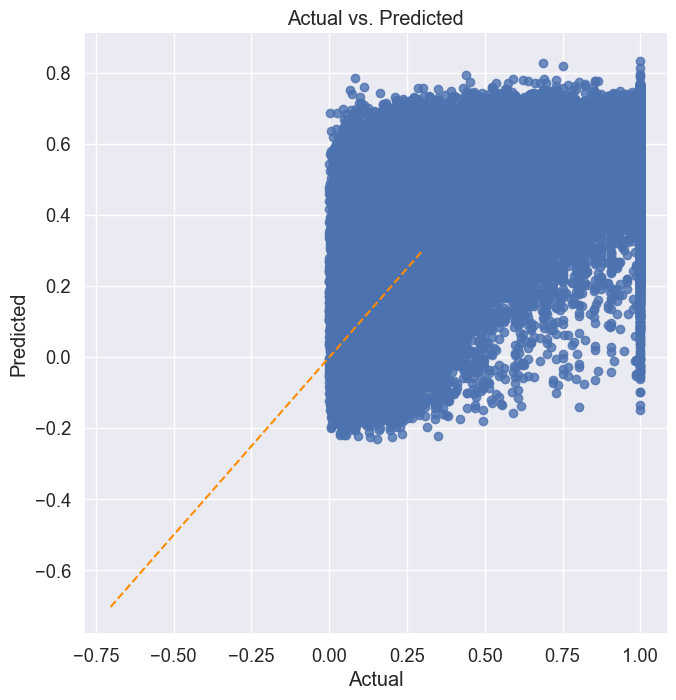

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


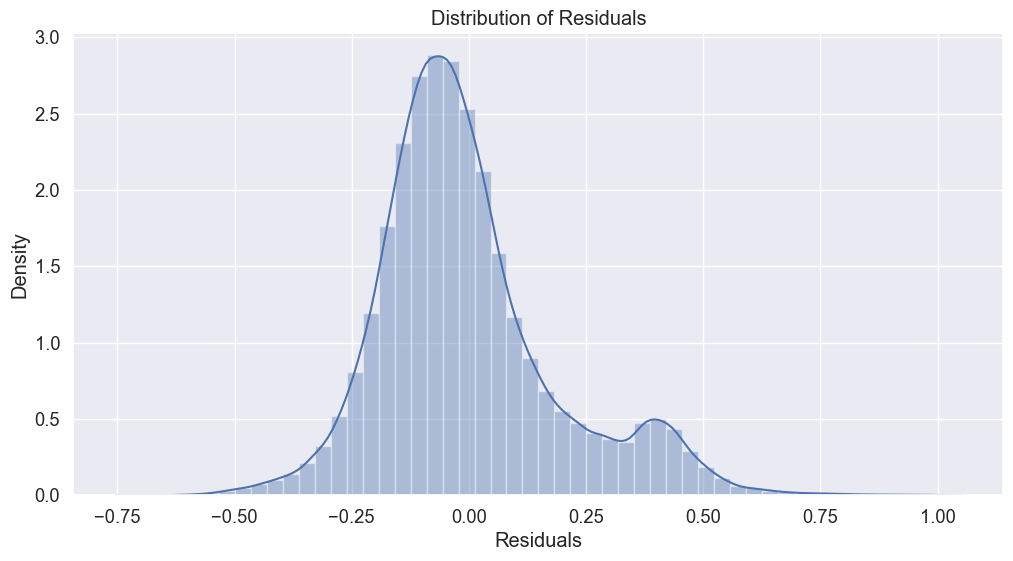


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.998129400606463
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


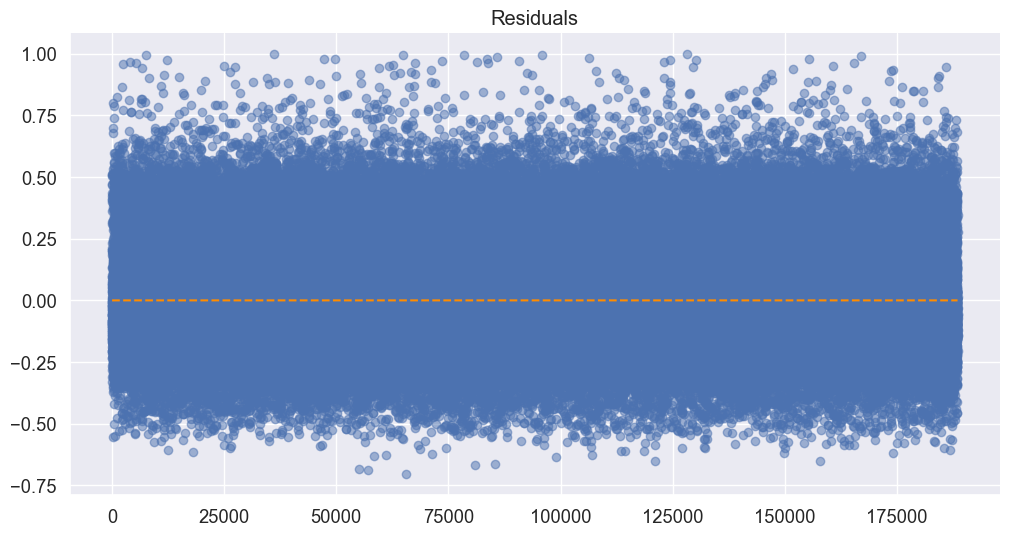

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [ ]:
#linear_assumption(linear_model, linear_X, linear_y)
linear_regression_assumptions(X, y, feature_names = feature_names)

In [ ]:
[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[21.021957979279275,
 4.662878119835628,
 11.656850887322593,
 10.0109739787894,
 18.90481613766253,
 1.7689392056395628,
 4.076656600738574,
 4.447715398595855,
 3.168792142851448]

In [ ]:
show_VIF(X)

,Feature,VIF
1,model_EDA,21.021958
5,fuel_type,18.904816
3,Cylinders,11.656851
4,cylinder_layout,10.010974
2,model_year_EDA,4.662878
8,accident,4.447715
0,brand_EDA,4.175536
7,color_category,4.076657
9,milage,3.168792
6,int_col_EDA,1.768939


In [ ]:
print('Try removing highly collinear variables')
calculate_vif_(X).head()

Try removing highly collinear variables
dropping 'model_EDA' at index: 1
dropping 'fuel_type' at index: 4
dropping 'Cylinders' at index: 2
dropping 'cylinder_layout' at index: 2
Remaining variables:
Index(['brand_EDA', 'model_year_EDA', 'int_col_EDA', 'color_category',
       'accident', 'milage'],
      dtype='object')


,brand_EDA,model_year_EDA,int_col_EDA,color_category,accident,milage
0,8,10,6,0,1,1.000000
1,8,10,0,1,0,0.707866
2,2,10,6,2,1,0.675630
3,8,3,1,1,1,0.095932
4,7,7,0,1,1,0.036039


In [ ]:
X         =   df.loc[:, ['brand_EDA', 'model_year_EDA', 'int_col_EDA', 'color_category','accident', 'milage']]
show_VIF(X)

,Feature,VIF
1,model_year_EDA,4.148337
0,brand_EDA,3.517346
3,color_category,3.494236
4,accident,3.353933
5,milage,2.495774
2,int_col_EDA,1.730311


In [ ]:
X1                     =   df.loc[:,['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident', 'milage']]
y1                     =   df.loc[:, 'price']

In [ ]:
feature_names         =   ['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident', 'milage']

In [ ]:
X1_                   = sm.add_constant(X1)
model                = sm.OLS(y1, X1_).fit()
predictions          = model.predict(X1_)


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 2.340e+04
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:15:11   Log-Likelihood:                 34868.
No. Observations:              188533   AIC:                        -6.972e+04
Df Residuals:                  188526   BIC:                        -6.965e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5205      0.002    266.593      0.000       0.517       0.524
brand_EDA          0.0014      0.000      9.130      0.000       0.001       0.002
model_year_EDA     0.0028      0.000     19.715      0.000       0.003       0.003
int_col_EDA        0.0035      0.000     20.745      0.000       0.003       0.004
color_category    -0.0029      0.001     -4.842      0.000      -0.004      -0.002
accident           0.0454      0.001     40.484      0.000       0.043       0.048
milage            -0.6937      0.002   -333.822      0.000      -0.698      -0.690
==============================================================================
Omnibus:                    22365.691   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32605.084
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       3.961   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.42688115422774775 

Coefficients
-------------------------------------
Intercept: 0.5204555833383093
brand_EDA: 0.001389806957235618
model_year_EDA: 0.0028470283980066013
int_col_EDA: 0.003470181889105869
color_category: -0.0028737200820980837
accident: 0.04539696768509425
milage: -0.6936608720967194

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


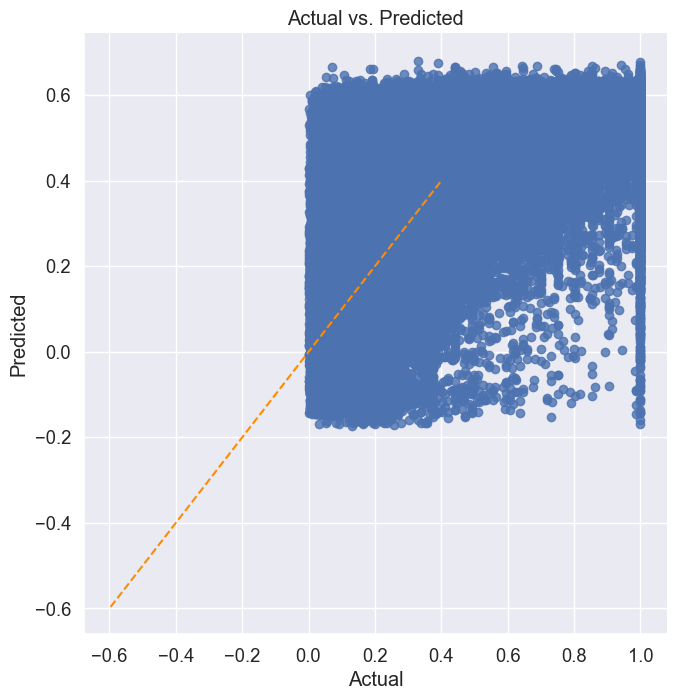

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


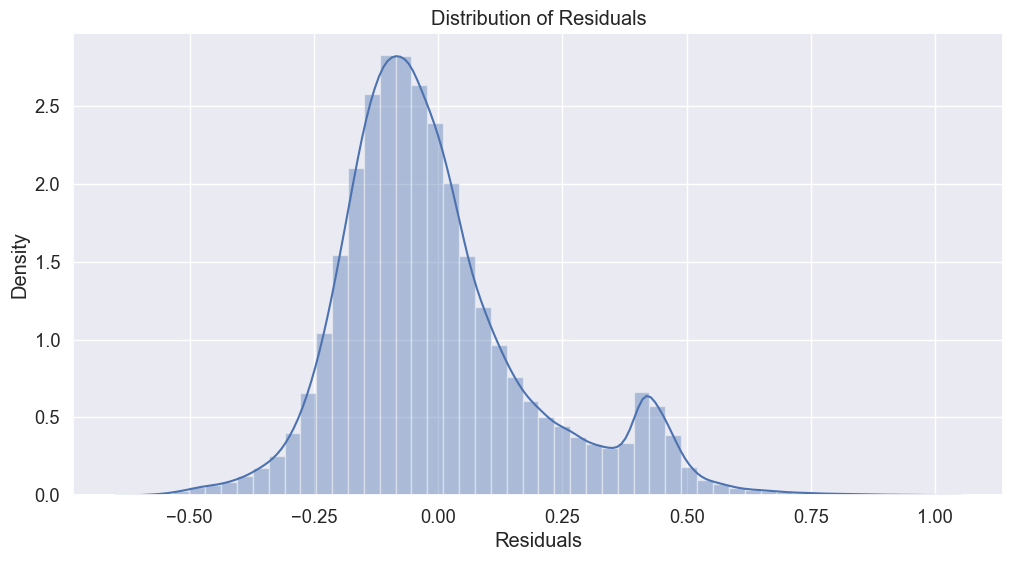


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9956907843889002
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


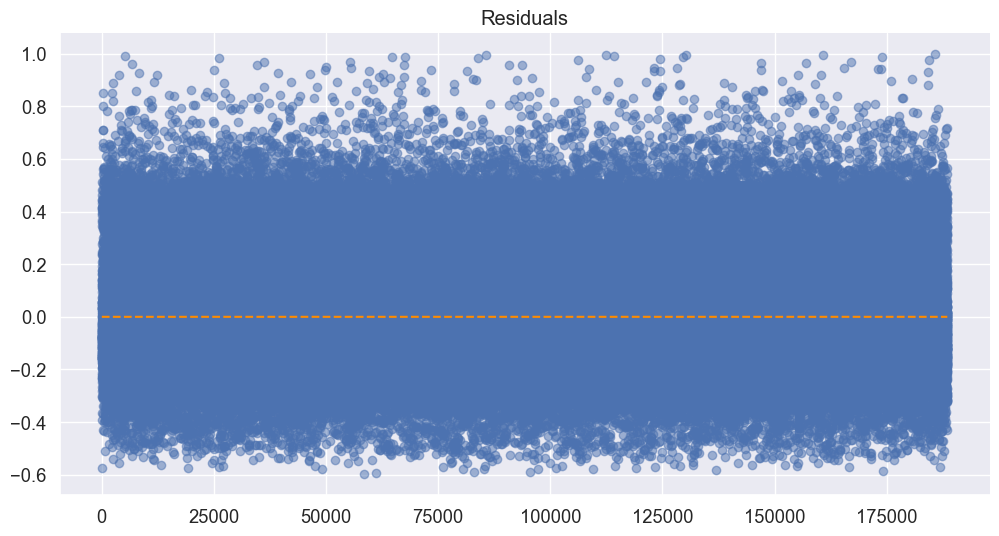

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [ ]:
#linear_assumption(linear_model, linear_X, linear_y)
linear_regression_assumptions(X1, y1, feature_names = feature_names)

In [ ]:
t=df.copy()

In [ ]:
t.head()

,brand_EDA,model_EDA,model_year_EDA,transmission_EDA,HP,Litres,Cylinders,cylinder_layout,fuel_type,ext_col_EDA,int_col_EDA,color_category,accident,milage,price
0,8,10,10,0,172.0,1.6,4,2,3,7,6,0,1,1.000000,0.022622
1,8,10,10,0,252.0,3.9,8,2,3,9,0,1,0,0.707866,0.030838
2,2,10,10,0,320.0,5.3,8,2,2,1,6,2,1,0.675630,0.122365
3,8,10,3,9,420.0,5.0,8,2,3,0,1,1,1,0.095932,0.442159
4,7,10,7,6,208.0,2.0,4,2,3,0,0,1,1,0.036039,0.982005


In [ ]:
for i in t.columns:
  t[i]=np.sqrt(t[[i]])

In [ ]:
t.head()

,brand_EDA,model_EDA,model_year_EDA,transmission_EDA,HP,Litres,Cylinders,cylinder_layout,fuel_type,ext_col_EDA,int_col_EDA,color_category,accident,milage,price
0,2.828427,3.162278,3.162278,0.00000,13.114877,1.264911,2.000000,1.414214,1.732051,2.645751,2.44949,0.000000,1.0,1.000000,0.150406
1,2.828427,3.162278,3.162278,0.00000,15.874508,1.974842,2.828427,1.414214,1.732051,3.000000,0.00000,1.000000,0.0,0.841348,0.175608
2,1.414214,3.162278,3.162278,0.00000,17.888544,2.302173,2.828427,1.414214,1.414214,1.000000,2.44949,1.414214,1.0,0.821967,0.349807
3,2.828427,3.162278,1.732051,3.00000,20.493902,2.236068,2.828427,1.414214,1.732051,0.000000,1.00000,1.000000,1.0,0.309728,0.664951
4,2.645751,3.162278,2.645751,2.44949,14.422205,1.414214,2.000000,1.414214,1.732051,0.000000,0.00000,1.000000,1.0,0.189838,0.990962


In [ ]:
X3                    =   t.loc[:,['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident',
                                     'milage']]
y3                     =   t.loc[:, 'price']

In [ ]:
feature_names=['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident', 'milage']


In [ ]:
X3_                   = sm.add_constant(X3)
model3                = sm.OLS(y3, X3_).fit()
predictions4         = model3.predict(X3_)


model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 3.507e+04
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:15:15   Log-Likelihood:                 88971.
No. Observations:              188533   AIC:                        -1.779e+05
Df Residuals:                  188526   BIC:                        -1.779e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9061      0.002    418.749      0.000       0.902       0.910
brand_EDA          0.0011      0.000      2.660      0.008       0.000       0.002
model_year_EDA    -0.0143      0.000    -33.928      0.000      -0.015      -0.013
int_col_EDA        0.0068      0.000     16.658      0.000       0.006       0.008
color_category    -0.0025      0.001     -2.849      0.004      -0.004      -0.001
accident           0.0394      0.001     45.028      0.000       0.038       0.041
milage            -0.6751      0.002   -411.999      0.000      -0.678      -0.672
==============================================================================
Omnibus:                     6916.013   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12342.636
Skew:                           0.304   Prob(JB):                         0.00
Kurtosis:                       4.096   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y3.head()

0    0.150406
1    0.175608
2    0.349807
3    0.664951
4    0.990962
Name: price, dtype: float64

Fitting linear regression

R^2: 0.5274708702062774 

Coefficients
-------------------------------------
Intercept: 0.9061422952734446
brand_EDA: 0.001096665038055752
model_year_EDA: -0.014265908185606954
int_col_EDA: 0.006754186228354643
color_category: -0.002510431782428317
accident: 0.03941439767896234
milage: -0.6751281088641155

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


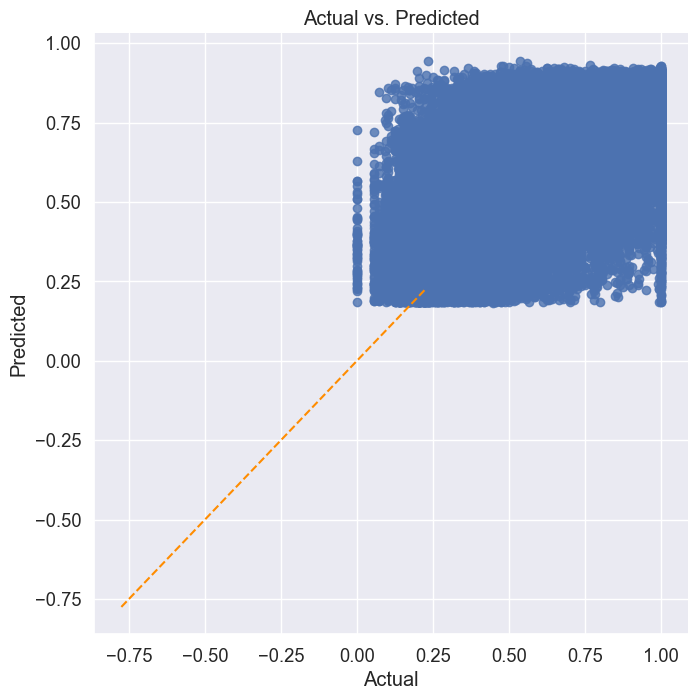

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


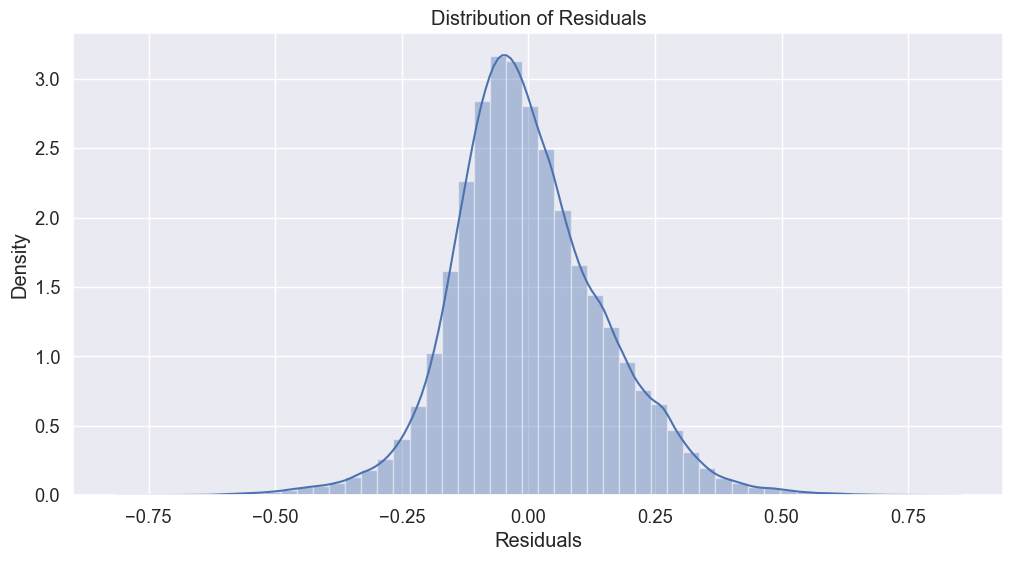


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9935870521713397
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


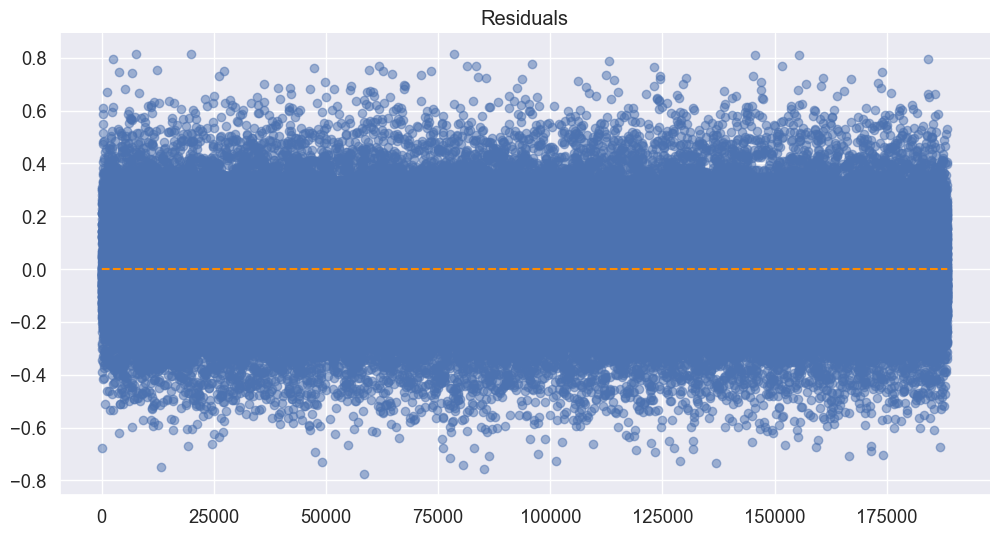

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [ ]:
#linear_assumption(linear_model, linear_X, linear_y)
linear_regression_assumptions(X3, y3, feature_names = feature_names)

In [ ]:
t1=df.copy()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
power_transform_yeo=PowerTransformer(method="yeo-johnson")

In [ ]:
for i in t.columns:
  t1[i]=power_transform_yeo.fit_transform(t1[[i]])

In [ ]:
t1.head()

,brand_EDA,model_EDA,model_year_EDA,transmission_EDA,HP,Litres,Cylinders,cylinder_layout,fuel_type,ext_col_EDA,int_col_EDA,color_category,accident,milage,price
0,0.839957,0.308097,1.180946,-1.270634,-1.678004,-1.502759,-1.205271,-0.393746,0.062285,0.602938,1.379138,-2.311028,0.408676,2.042052,-1.824010
1,0.839957,0.308097,1.180946,-1.270634,-0.741944,0.169129,1.028359,-0.393746,0.062285,0.937773,-1.760212,-0.355988,-1.679494,1.449701,-1.749846
2,-1.131097,0.308097,1.180946,-1.270634,-0.080471,1.106433,1.028359,-0.393746,-1.819588,-0.870374,1.379138,0.866328,0.408676,1.369886,-1.024235
3,0.839957,0.308097,-0.984777,1.229903,0.752368,0.909375,1.028359,-0.393746,0.062285,-1.327186,-0.239665,-0.355988,0.408676,-1.012644,0.567289
4,0.508745,0.308097,0.246246,0.678216,-1.229895,-1.195870,-1.205271,-0.393746,0.062285,-1.327186,-1.760212,-0.355988,0.408676,-1.435033,1.781951


In [ ]:
X4                     =   t1.loc[:,['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident',
                                     'milage']]
y4                     =   t1.loc[:, 'price']

In [ ]:
feature_names=['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident', 'milage']

In [ ]:
X4_                   = sm.add_constant(X4)
model4                = sm.OLS(y4, X4_).fit()
predictions4         = model4.predict(X4_)


model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                 3.898e+04
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:15:23   Log-Likelihood:            -1.9146e+05
No. Observations:              188533   AIC:                         3.829e+05
Df Residuals:                  188526   BIC:                         3.830e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.742e-16      0.002   3.08e-13      1.000      -0.003       0.003
brand_EDA         -0.0042      0.002     -2.700      0.007      -0.007      -0.001
model_year_EDA    -0.0941      0.002    -60.963      0.000      -0.097      -0.091
int_col_EDA        0.0284      0.002     18.329      0.000       0.025       0.031
color_category    -0.0026      0.002     -1.650      0.099      -0.006       0.000
accident           0.0662      0.002     40.993      0.000       0.063       0.069
milage            -0.7078      0.002   -431.705      0.000      -0.711      -0.705
==============================================================================
Omnibus:                     4358.507   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8292.546
Skew:                           0.166   Prob(JB):                         0.00
Kurtosis:                       3.972   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.553707115033211 

Coefficients
-------------------------------------
Intercept: 5.670282839155393e-16
brand_EDA: -0.004163056578707616
model_year_EDA: -0.09410210694297355
int_col_EDA: 0.028425168885151203
color_category: -0.0025919919454786416
accident: 0.06616870136876335
milage: -0.7078282709998494

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


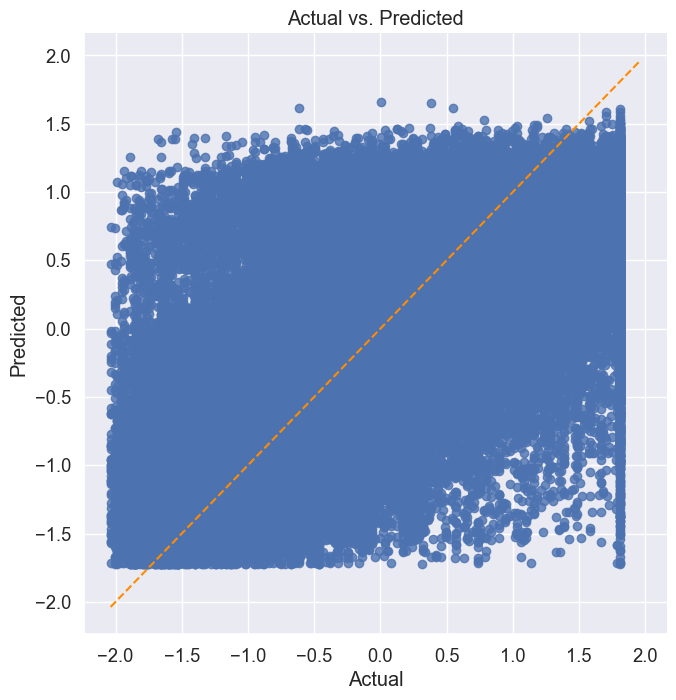

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


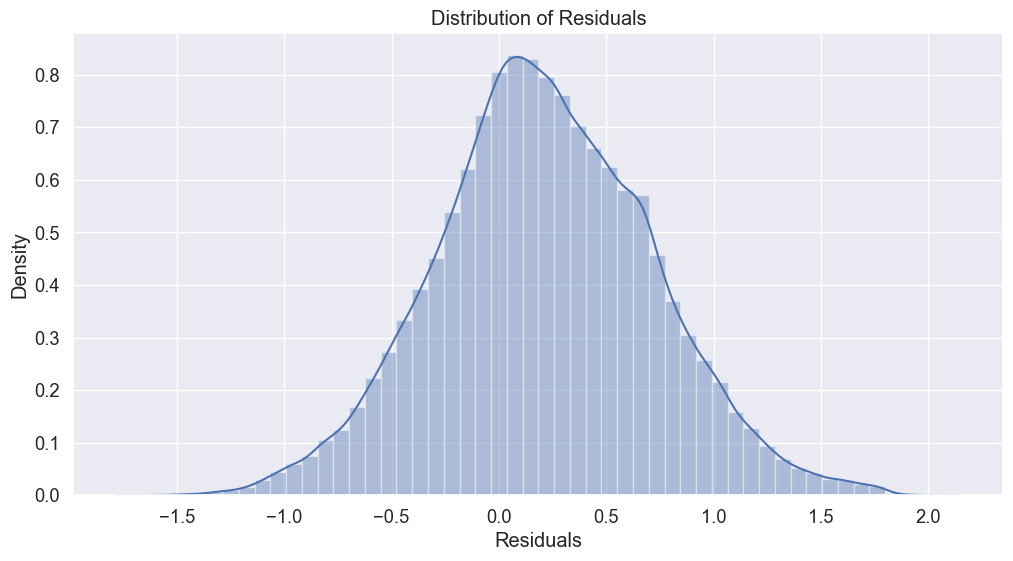


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.691046106228796
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


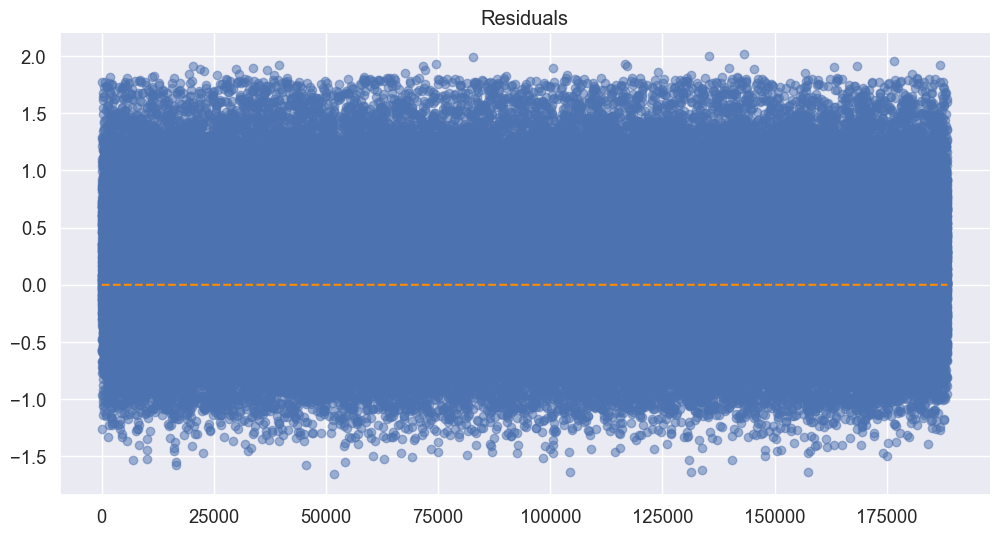

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [ ]:
#linear_assumption(linear_model, linear_X, linear_y)
linear_regression_assumptions(X4, y4, feature_names = feature_names)

# GLM Model

We observed that most of the assuption for linear regression model are failed.

We can often use Generalized Linear Models (GLMs) when the assumptions of linear regression are violated.

Here's why and when GLMs can be a suitable alternative:

Relaxed Assumptions: Linear regression relies on several assumptions, including:

Linear Relationship: A linear relationship between the independent variables and the mean of the dependent variable.

Normally Distributed Errors: The errors (residuals) are normally distributed.

Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.

GLMs offer more flexibility, particularly with the error distribution and the relationship between the dependent and independent variables.


In [ ]:
import  pandas                    as     pd
import  statsmodels.api           as     sm
from    sklearn.model_selection   import train_test_split

In [ ]:
data['price'].head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [ ]:
def  Build_GLM(X, y):
     from    sklearn.metrics import  mean_squared_error
     import  numpy           as      np

     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     # Add constant term for intercept
     X_train                 =    sm.add_constant(X_train)
     X_test                  =    sm.add_constant(X_test)
     # Add constant term for intercept
     X_train                 =    sm.add_constant(X_train)
     # Gaussian family with identity link (standard regression)
     glm_model               =    sm.GLM(y_train, X_train, family=sm.families.Gaussian())
     glm_results             =    glm_model.fit()
     print(glm_results.summary())
     print('Psuedo R square' , round(glm_results.pseudo_rsquared(kind='cs'),4))
    #Cox-Snell likelihood ratio pseudo R-squared is valid for both discrete and continuous data.

###
##---- Train data
###
     # Predict on training data
     train_predicted_prices    =  glm_results.predict(X_train)
     # print("Train Predicted Prices:", train_predicted_prices)
     train_rmse                 =  round(np.sqrt(mean_squared_error(y_train, train_predicted_prices)),4)
     print("Train Root Mean Squared Error(RMSE):", train_rmse)
###
##---- Test data
###
     # Predict on test data (or new data)
     test_predicted_prices    =  glm_results.predict(X_test)
     # print("Test Predicted Prices:", test_predicted_prices)
     test_rmse                 =  round(np.sqrt(mean_squared_error(y_test, test_predicted_prices)),4)
     print("Test Root Mean Squared Error(RMSE):", test_rmse)


In [ ]:
df.head()

In [ ]:
df1['price']

In [ ]:
X1                     =   df.loc[:,['brand_EDA', 'model_year_EDA', 'int_col_EDA','color_category','accident', 'milage']]
y1                     =   df1.loc[:, 'price']

In [ ]:
Build_GLM(X1, y1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:               150826
Model:                            GLM   Df Residuals:                   150819
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                         0.27118
Method:                          IRLS   Log-Likelihood:            -1.1560e+05
Date:                Wed, 23 Jul 2025   Deviance:                       40899.
Time:                        20:15:27   Pearson chi2:                 4.09e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7014
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.0023      0.006   1945.